#Importing necessary Libraries

In [311]:

import sympy as sy
import numpy as np
import pandas as pd
import math
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from scipy.stats import skew, kurtosis
from scipy import stats
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import chi2
import statsmodels


#Collection of Financial time series of the identified product set

##Collection of Data of Equity Index

In [312]:
EquityIndex = "Nifty 50 Historical Data.csv"
EquityIndex = pd.read_csv(EquityIndex)
EquityIndex = EquityIndex.rename(columns={'Price': 'EquityIndex'})

#print("EquityIndex columns and types before renaming:\n", EquityIndex.dtypes)
#EquityIndex['EquityIndex'] = EquityIndex['EquityIndex'].astype(float)

EquityIndex = pd.DataFrame(EquityIndex)
EquityIndex['Date'] = pd.to_datetime(EquityIndex['Date'])
EquityIndex.set_index('Date', inplace=True)
EquityIndex = EquityIndex.sort_values(by='Date')
EquityIndex.describe()
#EquityIndex

<ipython-input-312-225d5cb9c42c>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  EquityIndex['Date'] = pd.to_datetime(EquityIndex['Date'])


EquityIndex
count   5840.000000
mean    7458.826353
std     5484.447540
min      854.200000
25%     3182.625000
50%     5832.425000
75%    10532.800000
max    24044.500000

###Data Cleaning

In [313]:
print("Number of Missing Records - ", EquityIndex.isnull().sum())
EquityIndex = EquityIndex.ffill()
print("Number of Duplicate Records - ", EquityIndex.index.duplicated().sum())
EquityIndex = EquityIndex[~EquityIndex.index.duplicated(keep='first')]
EquityIndex.describe()

Number of Missing Records -  EquityIndex    0
dtype: int64
Number of Duplicate Records -  0


EquityIndex
count   5840.000000
mean    7458.826353
std     5484.447540
min      854.200000
25%     3182.625000
50%     5832.425000
75%    10532.800000
max    24044.500000

##Collection of Data of FX

In [314]:
FXUSDINR = "FXUSDINR_RBI.csv"
FXUSDINR = pd.read_csv(FXUSDINR)
#print("FXUSDINR columns and types before renaming:\n", FXUSDINR.dtypes)
FXUSDINR

FXUSDINR = pd.DataFrame(FXUSDINR)
FXUSDINR['Date'] = pd.to_datetime(FXUSDINR['Date'])
FXUSDINR.set_index('Date', inplace=True)
FXUSDINR = FXUSDINR.sort_values(by='Date')
FXUSDINR.describe()

<ipython-input-314-45d47ce86782>:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  FXUSDINR['Date'] = pd.to_datetime(FXUSDINR['Date'])


USD
count  5675.000000
mean     57.884138
std      13.233842
min      39.270000
25%      45.980000
50%      54.289500
75%      68.702900
max      83.586000

###Data Cleaning

In [315]:
print("Number of Missing Records - ", FXUSDINR.isnull().sum())
FXUSDINR = FXUSDINR.ffill()
print("Number of Duplicate Records - ", FXUSDINR.index.duplicated().sum())
FXUSDINR = FXUSDINR[~FXUSDINR.index.duplicated(keep='first')]
FXUSDINR.describe()

Number of Missing Records -  USD    0
dtype: int64
Number of Duplicate Records -  0


USD
count  5675.000000
mean     57.884138
std      13.233842
min      39.270000
25%      45.980000
50%      54.289500
75%      68.702900
max      83.586000

##Collection of Data of 10 Year GSec Yield

In [316]:
BondYield = "India 10-Year Bond Yield Historical Data.csv"
BondYield = pd.read_csv(BondYield)
BondYield = BondYield.rename(columns={'Price': 'BondYield'})
#print("BondYield columns and types before renaming:\n", BondYield.dtypes)
BondYield.head()

BondYield = pd.DataFrame(BondYield)
BondYield['Date'] = pd.to_datetime(BondYield['Date'])
BondYield.set_index('Date', inplace=True)
BondYield = BondYield.sort_values(by='Date')
BondYield.describe()

<ipython-input-316-a38ce954e3c8>:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  BondYield['Date'] = pd.to_datetime(BondYield['Date'])


BondYield
count  6106.000000
mean      7.381702
std       1.015099
min       4.962000
25%       6.729000
50%       7.425000
75%       7.981750
max      10.818000

###Data Cleaning

In [317]:
print("Number of Missing Records - ", BondYield.isnull().sum())
BondYield = BondYield.ffill()
print("Number of Duplicate Records - ", BondYield.index.duplicated().sum())
BondYield = BondYield[~BondYield.index.duplicated(keep='first')]
BondYield.describe()

Number of Missing Records -  BondYield    0
dtype: int64
Number of Duplicate Records -  0


BondYield
count  6106.000000
mean      7.381702
std       1.015099
min       4.962000
25%       6.729000
50%       7.425000
75%       7.981750
max      10.818000

##Collection of Data of Gold_Price

In [318]:
Gold = "WGC_GoldPriceINROunce.csv"
Gold = pd.read_csv(Gold)
Gold = Gold.rename(columns={'INR': 'Gold_Price'})
#print("BondYield columns and types before renaming:\n", Gold.dtypes)
Gold.head()

Gold = pd.DataFrame(Gold)
Gold['Date'] = pd.to_datetime(Gold['Date'])
Gold.set_index('Date', inplace=True)
Gold = Gold.sort_values(by='Date')
Gold.describe()

<ipython-input-318-e968ea84558f>:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Gold['Date'] = pd.to_datetime(Gold['Date'])


Gold_Price
count    6130.000000
mean    71643.801646
std     45868.071056
min     11936.130000
25%     27761.727500
50%     75460.965000
75%     90159.752500
max    202072.730000

###Data Cleaning

In [319]:
print("Number of Missing Records - ", Gold.isnull().sum())
Gold = Gold.ffill()
print("Number of Duplicate Records - ", Gold.index.duplicated().sum())
Gold = Gold[~Gold.index.duplicated(keep='first')]
Gold.describe()

Number of Missing Records -  Gold_Price    0
dtype: int64
Number of Duplicate Records -  0


Gold_Price
count    6130.000000
mean    71643.801646
std     45868.071056
min     11936.130000
25%     27761.727500
50%     75460.965000
75%     90159.752500
max    202072.730000

##Combined Data

In [320]:
merged_df = pd.merge(EquityIndex, BondYield, on='Date', how='inner').dropna()
merged_df = pd.merge(merged_df, FXUSDINR, on='Date', how='inner').dropna()
merged_df = pd.merge(merged_df, Gold, on='Date', how='inner').dropna()
merged_df.describe()

EquityIndex    BondYield          USD     Gold_Price
count   5670.000000  5670.000000  5670.000000    5670.000000
mean    7461.561164     7.376909    57.894244   71499.336868
std     5478.265413     0.991810    13.235258   45861.514671
min      854.200000     4.962000    39.270000   11936.130000
25%     3196.200000     6.741750    45.982500   27675.222500
50%     5833.475000     7.421500    54.292900   75379.615000
75%    10529.587500     7.965000    68.718650   90245.245000
max    24044.500000    10.818000    83.586000  202072.730000

###Data Cleaning

In [321]:
print("Number of Missing Records - ", merged_df.isnull().sum())
merged_df = merged_df.ffill()

print("Number of Duplicate Records - ", merged_df.duplicated().sum())
merged_df = merged_df.drop_duplicates()

merged_df.describe()

Number of Missing Records -  EquityIndex    0
BondYield      0
USD            0
Gold_Price     0
dtype: int64
Number of Duplicate Records -  0


EquityIndex    BondYield          USD     Gold_Price
count   5670.000000  5670.000000  5670.000000    5670.000000
mean    7461.561164     7.376909    57.894244   71499.336868
std     5478.265413     0.991810    13.235258   45861.514671
min      854.200000     4.962000    39.270000   11936.130000
25%     3196.200000     6.741750    45.982500   27675.222500
50%     5833.475000     7.421500    54.292900   75379.615000
75%    10529.587500     7.965000    68.718650   90245.245000
max    24044.500000    10.818000    83.586000  202072.730000

#Calculating the Returns

In [322]:
df_Returns = merged_df.pct_change()
df_Returns = pd.DataFrame(df_Returns)
#df_Returns['Date'] = pd.to_datetime(df_Returns['Date'])
#df_Returns.set_index('Date', inplace=True)
df_Returns

EquityIndex  BondYield       USD  Gold_Price
Date                                                    
2001-01-01          NaN        NaN       NaN         NaN
2001-01-02     0.013952   0.001389  0.000643   -0.012206
2001-01-03     0.015293  -0.002126  0.000214   -0.014253
2001-01-04     0.012701  -0.010005  0.000857    0.000134
2001-01-05     0.014989  -0.001216  0.000000    0.000909
...                 ...        ...       ...         ...
2024-06-24     0.001564  -0.000287 -0.000864   -0.004245
2024-06-25     0.007794   0.001721 -0.001033   -0.001833
2024-06-26     0.006218   0.002005  0.001359   -0.009323
2024-06-27     0.007361   0.000429 -0.000614    0.009677
2024-06-28    -0.001410   0.001143 -0.000434    0.002133

[5670 rows x 4 columns]

###Data Cleaning

In [323]:
print("Number of Missing Records - ", df_Returns.isnull().sum())
df_Returns = df_Returns.ffill()
print("Number of Duplicate Records - ", df_Returns.index.duplicated().sum())
df_Returns = df_Returns[~df_Returns.index.duplicated(keep='first')]
df_Returns.describe()

Number of Missing Records -  EquityIndex    1
BondYield      1
USD            1
Gold_Price     1
dtype: int64
Number of Duplicate Records -  0


EquityIndex    BondYield          USD   Gold_Price
count  5669.000000  5669.000000  5669.000000  5669.000000
mean      0.000617    -0.000047     0.000111     0.000538
std       0.013878     0.007731     0.004023     0.010821
min      -0.129805    -0.078040    -0.029617    -0.094828
25%      -0.005665    -0.002999    -0.001576    -0.004751
50%       0.000874     0.000000     0.000000     0.000166
75%       0.007407     0.002890     0.001725     0.006096
max       0.177441     0.130172     0.041019     0.077713

#Spliting the Data as per the election period

Bifurcating the data into Pre, Post & during the polling period for each election event.

In [324]:

def ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays):
  #Calculate the Election Phase
  PollingPhase = df_Returns.loc[PollingBigin:PollingEnd]
  PollingPhaseBefore = df_Returns.loc[PollingBigin - pd.DateOffset(days=Offsetperioddays):PollingBigin -pd.DateOffset(days=1) ]
  PollingPhaseAfter = df_Returns.loc[PollingEnd + pd.DateOffset(days=1):PollingEnd + pd.DateOffset(days=Offsetperioddays)]
  ElectionPhase = pd.concat([PollingPhaseBefore, PollingPhase, PollingPhaseAfter])
  PollingBegindate = PollingBigin
  PollingEnddate = PollingEnd
  ElectionPhaseAnalysis = pd.DataFrame(ElectionPhase)
  ElectionPhaseAnalysis['Cumulative_EquityIndex'] = (1 + ElectionPhaseAnalysis['EquityIndex']).cumprod() - 1
  ElectionPhaseAnalysis['CumulativeBondYield'] = (1 + ElectionPhaseAnalysis['BondYield']).cumprod() - 1
  ElectionPhaseAnalysis['Cumulative_USD'] = (1 + ElectionPhaseAnalysis['USD']).cumprod() - 1
  ElectionPhaseAnalysis['Cumulative_Gold_Price'] = (1 + ElectionPhaseAnalysis['Gold_Price']).cumprod() - 1

  # Plot the returns
  plt.figure(figsize=(14, 7))
  plt.plot( ElectionPhaseAnalysis['Cumulative_EquityIndex'], label='Equity Index Return')
  plt.plot( ElectionPhaseAnalysis['CumulativeBondYield'], label='BondYield Return')
  plt.plot( ElectionPhaseAnalysis['Cumulative_USD'], label='USD Return')
  plt.plot( ElectionPhaseAnalysis['Cumulative_Gold_Price'], label='Gold_Price Return')

  plt.axvline(pd.to_datetime(PollingBegindate), color='r', linestyle='--', lw=2, label='Polling Begin Date')
  plt.axvline(pd.to_datetime(PollingEnddate), color='g', linestyle='--', lw=2, label='Polling End Date')


  plt.fill_between(ElectionPhaseAnalysis.index,
                  ElectionPhaseAnalysis['Cumulative_EquityIndex'].min(),
                  ElectionPhaseAnalysis['Cumulative_EquityIndex'].max(),
                  where=(ElectionPhaseAnalysis.index >= pd.to_datetime(PollingBegindate)) &
                        (ElectionPhaseAnalysis.index <= pd.to_datetime(PollingEnddate)),
                  color='gray', alpha=0.3)


  plt.xlabel('Date')
  plt.ylabel('Return')
  plt.title(f"Cumulative Daily Returns of Product Sets for {NameA} with polling offset of {Offsetperioddays} days")
  plt.legend()
  plt.show()


  print(ElectionPhase.describe().loc["count"])
  print(PollingPhaseBefore.describe().loc["count"])
  print(PollingPhase.describe().loc["count"])
  print(PollingPhaseAfter.describe().loc["count"])

  print("========================================================")


  return ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter

#  PollingPhaseBefore = df_Returns.loc[PollingBigin - pd.DateOffset(days=Offsetperioddays):PollingBigin -pd.DateOffset(days=1) ]
#  PollingPhaseAfter = df_Returns.loc[PollingEnd + pd.DateOffset(days=1):PollingEnd + pd.DateOffset(days=Offsetperioddays)]

#  ElectionPhase = pd.concat([PollingPhaseBefore, PollingPhase, PollingPhaseAfter])

#ElectionPhase

In [325]:
def add_phase_column(df, phase_name):
      df["Phase"] = phase_name
      return df


  # Calculate various statistics


def statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter ):
  new_stats_df = pd.DataFrame({
      "Phase": NameA,
      "Mean": ElectionPhase.describe().loc["mean"],
      "Standard Deviation": ElectionPhase.std(),
      "Variance": ElectionPhase.var(),
      "Skewness": skew(ElectionPhase),
      "Kurtosis": kurtosis(ElectionPhase),
  })
  CovA =  pd.DataFrame((f'{NameA} ', ElectionPhase.cov()))
  CorA =  pd.DataFrame((f'{NameA} ', ElectionPhase.corr()))
  CovA = add_phase_column(pd.DataFrame(ElectionPhase.cov()), NameA)
  CorA = add_phase_column(pd.DataFrame(ElectionPhase.corr()), NameA)
  combined_stats_df = new_stats_df
  combined_CovA = CovA
  combined_CorA = CorA


  new_stats_df = pd.DataFrame({
      "Phase": NameB,
      "Mean": PollingPhaseBefore.describe().loc["mean"],
      "Standard Deviation": PollingPhaseBefore.std(),
      "Variance": PollingPhaseBefore.var(),
      "Skewness": skew(PollingPhaseBefore),
      "Kurtosis": kurtosis(PollingPhaseBefore),
  })
  CovA =  pd.DataFrame((f'{NameB} ', PollingPhaseBefore.cov()))
  CorA =  pd.DataFrame((f'{NameB} ', PollingPhaseBefore.corr()))
  CovA = add_phase_column(pd.DataFrame(PollingPhaseBefore.cov()), NameB)
  CorA = add_phase_column(pd.DataFrame(PollingPhaseBefore.corr()), NameB)
  combined_stats_df = pd.concat([combined_stats_df, new_stats_df], axis=0)
  combined_CovA = pd.concat([combined_CovA, CovA], axis=0)
  combined_CorA = pd.concat([combined_CorA, CorA], axis=0)



  new_stats_df = pd.DataFrame({
      "Phase": NameC,
      "Mean": PollingPhase.describe().loc["mean"],
      "Standard Deviation": PollingPhase.std(),
      "Variance": PollingPhase.var(),
      "Skewness": skew(PollingPhase),
      "Kurtosis": kurtosis(PollingPhase),
  })
  CovA =  pd.DataFrame((f'{NameC} ', PollingPhase.cov()))
  CorA =  pd.DataFrame((f'{NameC} ', PollingPhase.corr()))
  CovA = add_phase_column(pd.DataFrame(PollingPhase.cov()), NameC)
  CorA = add_phase_column(pd.DataFrame(PollingPhase.corr()), NameC)
  combined_stats_df = pd.concat([combined_stats_df, new_stats_df], axis=0)
  combined_CovA = pd.concat([combined_CovA, CovA], axis=0)
  combined_CorA = pd.concat([combined_CorA, CorA], axis=0)

  new_stats_df = pd.DataFrame({
      "Phase": NameD,
      "Mean": PollingPhaseAfter.describe().loc["mean"],
      "Standard Deviation": PollingPhaseAfter.std(),
      "Variance": PollingPhaseAfter.var(),
      "Skewness": skew(PollingPhaseAfter),
      "Kurtosis": kurtosis(PollingPhaseAfter),
  })
  CovA =  pd.DataFrame((f'{NameD} ', PollingPhaseAfter.cov()))
  CorA =  pd.DataFrame((f'{NameD} ', PollingPhaseAfter.corr()))
  CovA = add_phase_column(pd.DataFrame(PollingPhaseAfter.cov()), NameD)
  CorA = add_phase_column(pd.DataFrame(PollingPhaseAfter.corr()), NameD)

  combined_stats_df = pd.concat([combined_stats_df, new_stats_df], axis=0)
  combined_CovA = pd.concat([combined_CovA, CovA], axis=0)
  combined_CorA = pd.concat([combined_CorA, CorA], axis=0)

  # Save the combined statistics to the CSV file
  combined_stats_df.to_csv(f'Statistics {NameA}_{Offsetperioddays}.csv', index=True)
  combined_CovA.to_csv(f'Covariance {NameA}_{Offsetperioddays}.csv', index=True)
  combined_CorA.to_csv(f'Correlation {NameA}_{Offsetperioddays}.csv', index=True)
  print(f'Statistical Summary of the {NameA} :\n')
  print(pd.DataFrame(combined_stats_df))

  print(f'Covariance Summary of the {NameA} :\n')
  print(combined_CovA)

  df = pd.DataFrame(combined_CovA)

  new_data = {
      'Matrix': [],
      'EquityIndex vs BondYield': [],
      'EquityIndex vs USD': [],
      'EquityIndex vs Gold Price': [],
      'BondYield vs USD': [],
      'BondYield vs Gold Price': [],
      'USD vs Gold Price': []
  }


  phases = ['Pre-Polling Period ', 'Polling Period ', 'Post-Polling Period ']
  for phase in phases:
      phase_df = df[df['Phase'] == phase]
      new_data['Matrix'].append(phase)
      new_data['EquityIndex vs BondYield'].append(phase_df.loc[phase_df.index[0], 'BondYield'])
      new_data['EquityIndex vs USD'].append(phase_df.loc[phase_df.index[0], 'USD'])
      new_data['EquityIndex vs Gold Price'].append(phase_df.loc[phase_df.index[0], 'Gold_Price'])
      new_data['BondYield vs USD'].append(phase_df.loc[phase_df.index[1], 'USD'])
      new_data['BondYield vs Gold Price'].append(phase_df.loc[phase_df.index[1], 'Gold_Price'])
      new_data['USD vs Gold Price'].append(phase_df.loc[phase_df.index[2], 'Gold_Price'])

  CovMatrix = pd.DataFrame(new_data)

  plt.figure(figsize=(14, 7))

  for column in CovMatrix.columns[1:]:
      plt.plot(CovMatrix['Matrix'], CovMatrix[column], marker='o', label=column)

  plt.xlabel('Phase')
  plt.ylabel('Covariance Matrix')
  plt.title(f"Covariance Result During Different Phases for {NameA} with polling offset of {Offsetperioddays} days")

  plt.legend()
  plt.grid(True)
  #print(plt.show())



  print(f'correlations Summary of the {NameA} :\n')
  print(combined_CorA)


  df = pd.DataFrame(combined_CorA)

  new_data = {
      'Matrix': [],
      'EquityIndex vs BondYield': [],
      'EquityIndex vs USD': [],
      'EquityIndex vs Gold Price': [],
      'BondYield vs USD': [],
      'BondYield vs Gold Price': [],
      'USD vs Gold Price': []
  }

  # Fill in the new table
  phases = ['Pre-Polling Period ', 'Polling Period ', 'Post-Polling Period ']
  for phase in phases:
      phase_df = df[df['Phase'] == phase]
      new_data['Matrix'].append(phase)
      new_data['EquityIndex vs BondYield'].append(phase_df.loc[phase_df.index[0], 'BondYield'])
      new_data['EquityIndex vs USD'].append(phase_df.loc[phase_df.index[0], 'USD'])
      new_data['EquityIndex vs Gold Price'].append(phase_df.loc[phase_df.index[0], 'Gold_Price'])
      new_data['BondYield vs USD'].append(phase_df.loc[phase_df.index[1], 'USD'])
      new_data['BondYield vs Gold Price'].append(phase_df.loc[phase_df.index[1], 'Gold_Price'])
      new_data['USD vs Gold Price'].append(phase_df.loc[phase_df.index[2], 'Gold_Price'])

  # Convert the new data to a dataframe
  CorrMatrix = pd.DataFrame(new_data)
  # Plot the correlations
  plt.figure(figsize=(14, 7))

  # Iterate over each pair of variables and plot their correlations
  for column in CorrMatrix.columns[1:]:
      plt.plot(CorrMatrix['Matrix'], CorrMatrix[column], marker='o', label=column)

  plt.xlabel('Phase')
  plt.ylabel('Correlation')
  plt.title(f"Correlation Result During Different Phases for {NameA} with polling offset of {Offsetperioddays} days")

  plt.legend()
  plt.grid(True)
  plt.show()



In [326]:
def statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter):
  levene_test_EquityIndex = stats.levene(PollingPhase['EquityIndex'], PollingPhaseBefore['EquityIndex'])
  levene_test_BondYield = stats.levene(PollingPhase['BondYield'], PollingPhaseBefore['BondYield'])
  levene_test_USD = stats.levene(PollingPhase['USD'], PollingPhaseBefore['USD'])
  levene_test_Gold = stats.levene(PollingPhase['Gold_Price'], PollingPhaseBefore['Gold_Price'])

  print (f"Levenes Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Polling Period")
  levene_results = pd.DataFrame({
      "Variable": ["EquityIndex", "BondYield", "USD", "Gold Price"],
      "Levene's Test Statistic": [levene_test_EquityIndex.statistic, levene_test_BondYield.statistic, levene_test_USD.statistic, levene_test_Gold.statistic],
      "p-value": [levene_test_EquityIndex.pvalue, levene_test_BondYield.pvalue, levene_test_USD.pvalue, levene_test_Gold.pvalue]
  })
  print(levene_results.to_string(index=False))

  levene_test_EquityIndex = stats.levene(PollingPhaseAfter['EquityIndex'], PollingPhaseBefore['EquityIndex'])
  levene_test_BondYield = stats.levene(PollingPhaseAfter['BondYield'], PollingPhaseBefore['BondYield'])
  levene_test_USD = stats.levene(PollingPhaseAfter['USD'], PollingPhaseBefore['USD'])
  levene_test_Gold = stats.levene(PollingPhaseAfter['Gold_Price'], PollingPhaseBefore['Gold_Price'])

  print (f"Levenes Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Post-Polling Period")
  levene_results = pd.DataFrame({
      "Variable": ["EquityIndex", "BondYield", "USD", "Gold Price"],
      "Levene's Test Statistic": [levene_test_EquityIndex.statistic, levene_test_BondYield.statistic, levene_test_USD.statistic, levene_test_Gold.statistic],
      "p-value": [levene_test_EquityIndex.pvalue, levene_test_BondYield.pvalue, levene_test_USD.pvalue, levene_test_Gold.pvalue]
  })
  print(levene_results.to_string(index=False))

In [327]:
def box_m_test(groups):
    k = len(groups)
    p = groups[0].shape[0]
    N = sum(group.shape[0] for group in groups)
    pooled_cov = sum((group.shape[0] - 1) * group for group in groups) / (N - k)
    M = (N - k) * np.log(np.linalg.det(pooled_cov))
    for group in groups:
        M -= (group.shape[0] - 1) * np.log(np.linalg.det(group))
    c = ((2 * p**2 + 3 * p - 1) * (sum(1 / (group.shape[0] - 1) for group in groups) - 1 / (N - k))) / (6 * (p + 1) * (k - 1))
    M *= 1 - c
    df = p * (p + 1) * (k - 1) / 2
    p_value = 1 - chi2.cdf(M, df)
    return M, p_value

In [328]:
def statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter):
  array_1 = PollingPhaseBefore.cov().to_numpy()
  array_2 = PollingPhase.cov().to_numpy()
  groups = [array_1, array_2]
  M, p_value = box_m_test(groups)
  print (f"Boxs M Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Polling Period")
  print(f"Box's M statistic: {M}")
  print(f"P-value: {p_value}")
  array_1 = PollingPhaseBefore.cov().to_numpy()
  array_2 = PollingPhase.cov().to_numpy()
  groups = [array_1, array_2]
  M, p_value = box_m_test(groups)
  print (f"Boxs M Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Post-Polling Period")
  print(f"Box's M statistic: {M}")
  print(f"P-value: {p_value}")



In [329]:
# Fisher's Z-Test for comparing correlations
def fisher_z_test(r1, r2, n1, n2):
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    se_diff = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    z = (z1 - z2) / se_diff
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p_value

def statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter):
  # Calculate correlations
  corr1 = PollingPhase.corr()
  corr2 = PollingPhaseBefore.corr()
  # Perform Fisher's Z-Test
  z, p_value = fisher_z_test(corr1, corr2, len(PollingPhase), len(PollingPhaseBefore))
  print (f"Fisher's Z Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Polling Period")
  print("Fisher's Z-Test: Z =", pd.DataFrame(z), "\n", "P-value =", pd.DataFrame(p_value))

  corr1 = PollingPhaseAfter.corr()
  corr2 = PollingPhaseBefore.corr()
  # Perform Fisher's Z-Test
  z, p_value = fisher_z_test(corr1, corr2, len(PollingPhaseAfter), len(PollingPhaseBefore))
  print (f"Fisher's Z Test Result for {NameA} with polling offset of {Offsetperioddays} days with comparision of Pre-Polling vs Post-Polling Period")
  print("Fisher's Z-Test: Z =", pd.DataFrame(z), "\n", "P-value =", pd.DataFrame(p_value))

##Election Phase 14

In [330]:
NameA = 'Election Phase 14 '
NameB = "Pre-Polling Period "
NameC = "Polling Period "
NameD = "Post-Polling Period "
PollingBigin = pd.to_datetime('2004-04-20')
PollingEnd = pd.to_datetime('2004-05-13')

###Election Phase 14 with 90 days pre & post polling period

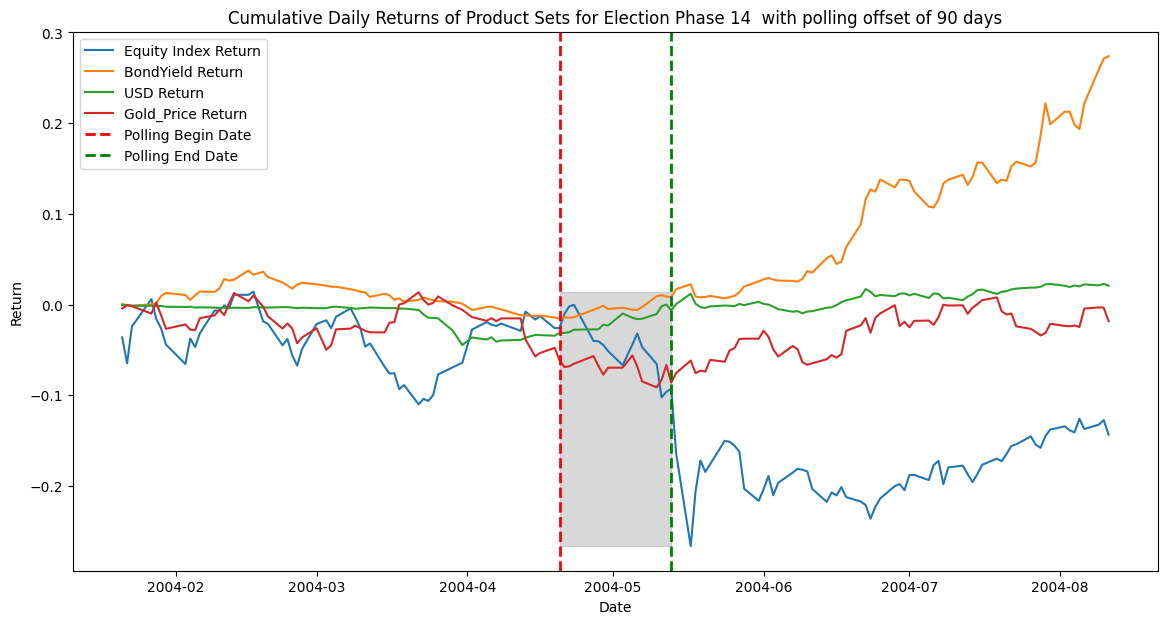

EquityIndex    136.0
BondYield      136.0
USD            136.0
Gold_Price     136.0
Name: count, dtype: float64
EquityIndex    56.0
BondYield      56.0
USD            56.0
Gold_Price     56.0
Name: count, dtype: float64
EquityIndex    16.0
BondYield      16.0
USD            16.0
Gold_Price     16.0
Name: count, dtype: float64
EquityIndex    64.0
BondYield      64.0
USD            64.0
Gold_Price     64.0
Name: count, dtype: float64


In [331]:
Offsetperioddays = 90
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 14  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 14  -0.000889            0.022171  0.000492   
BondYield      Election Phase 14   0.001813            0.008003  0.000064   
USD            Election Phase 14   0.000157            0.003634  0.000013   
Gold_Price     Election Phase 14  -0.000086            0.009995  0.000100   
EquityIndex   Pre-Polling Period  -0.000309            0.018145  0.000329   
BondYield     Pre-Polling Period  -0.000249            0.003687  0.000014   
USD           Pre-Polling Period  -0.000618            0.003367  0.000011   
Gold_Price    Pre-Polling Period  -0.000825            0.009874  0.000097   
EquityIndex       Polling Period  -0.004277            0.018148  0.000329   
BondYield         Polling Period   0.001410            0.003857  0.000015   
USD               Polling Period   0.001783            0.004857  0.000024   
Gold_Price        Polling P

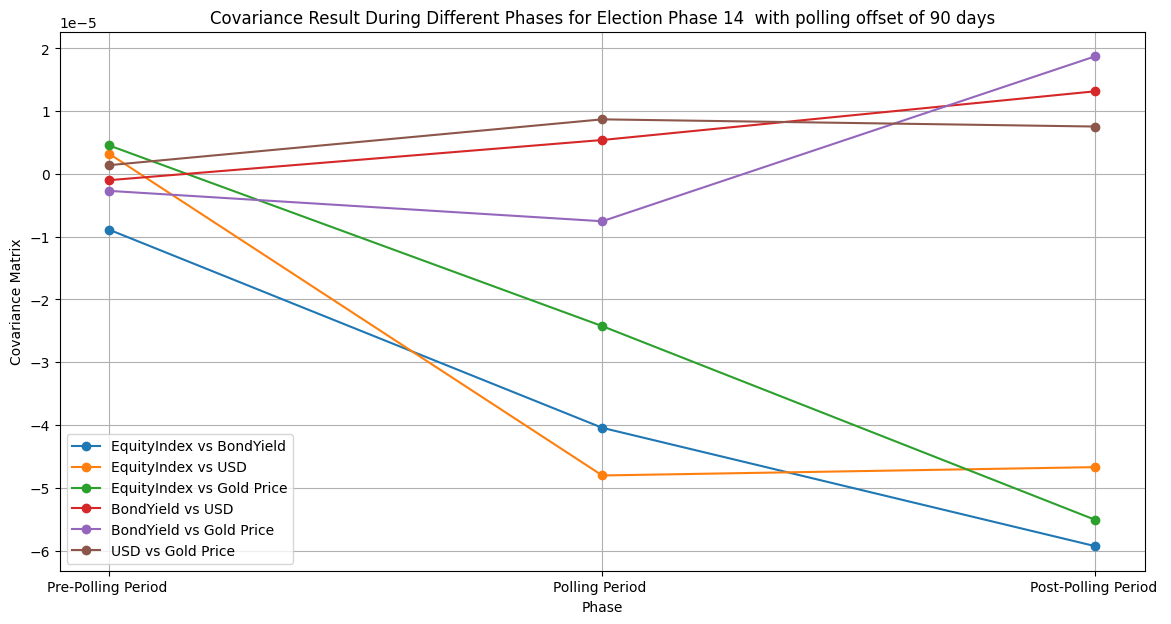

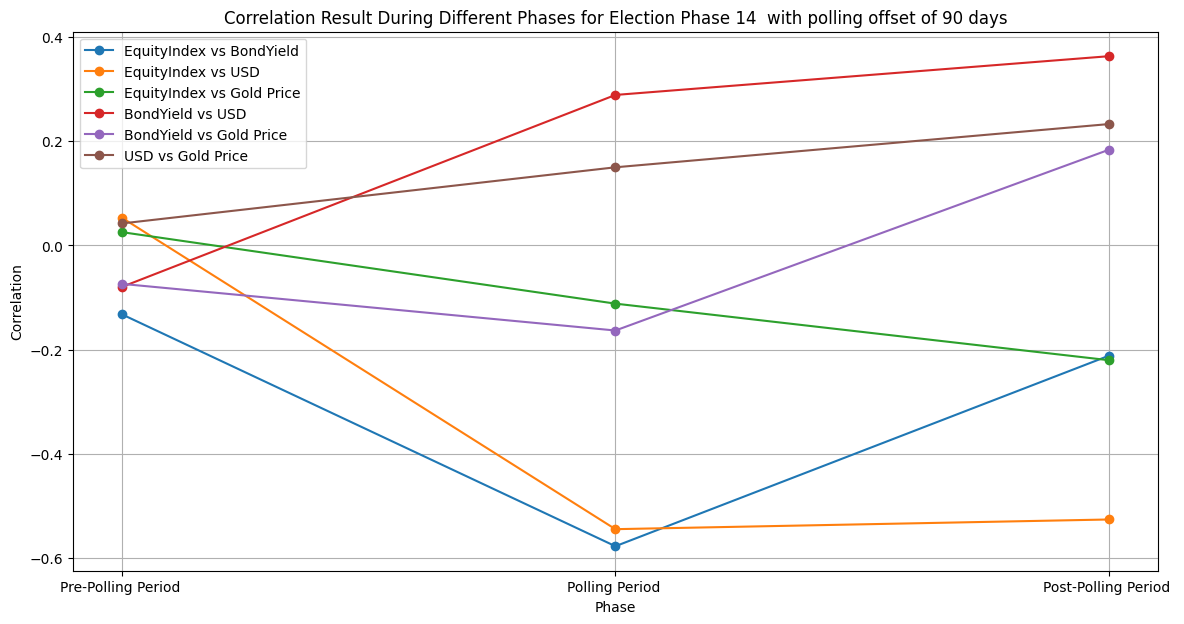

In [332]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [333]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.057378 0.811389
  BondYield                 0.040139 0.841789
        USD                 4.473277 0.037990
 Gold Price                 2.258882 0.137348
Levenes Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.436391 0.510157
  BondYield                22.879931 0.000005
        USD                 3.872034 0.051443
 Gold Price                 0.283621 0.595339


In [334]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.44987133332426904
P-value: 0.9999960196232486
Boxs M Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.44987133332426904
P-value: 0.9999960196232486


In [335]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -1.698321 -2.145696   -0.444892
BondYield      -1.698321        NaN  1.218497   -0.293529
USD            -2.145696   1.218497       NaN    0.351821
Gold_Price     -0.444892  -0.293529  0.351821         NaN 
 P-value =           0         1         2         3
0       NaN  0.089447  0.031897  0.656398
1  0.089447       NaN  0.223035  0.769118
2  0.031897  0.223035       NaN  0.724972
3  0.656398  0.769118  0.724972       NaN
Fisher's Z Test Result for Election Phase 14  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -0.436335 -3.397626   -1.328557
BondYield      -0.436335        NaN  2.451846    1.382923
USD          

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 14 with 180 days pre & post polling period

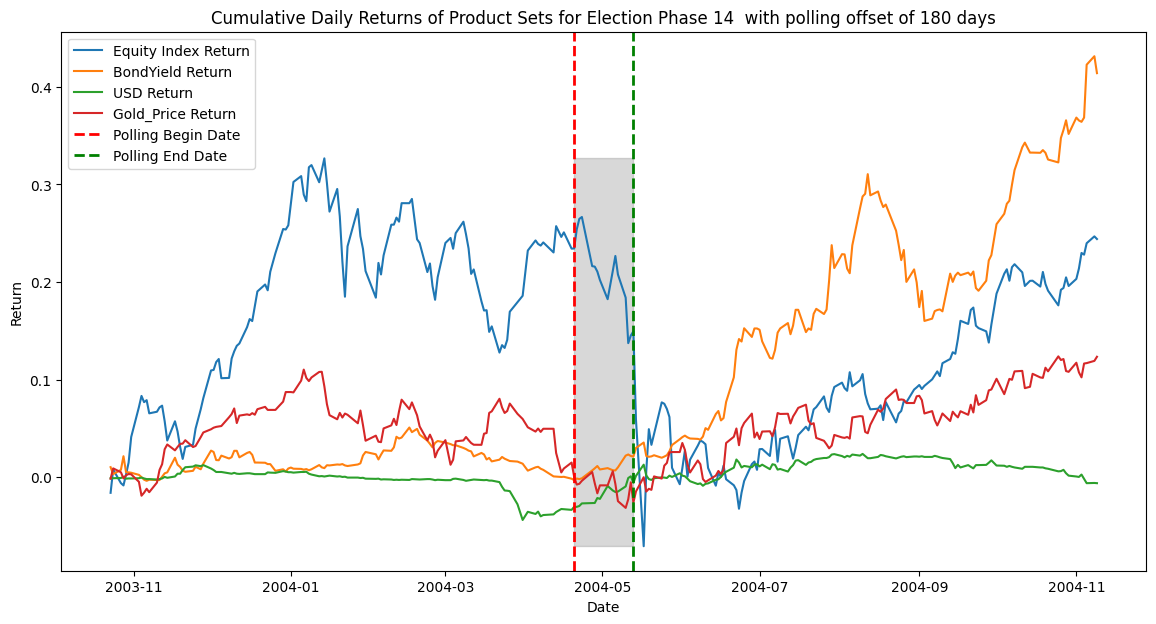

EquityIndex    258.0
BondYield      258.0
USD            258.0
Gold_Price     258.0
Name: count, dtype: float64
EquityIndex    118.0
BondYield      118.0
USD            118.0
Gold_Price     118.0
Name: count, dtype: float64
EquityIndex    16.0
BondYield      16.0
USD            16.0
Gold_Price     16.0
Name: count, dtype: float64
EquityIndex    124.0
BondYield      124.0
USD            124.0
Gold_Price     124.0
Name: count, dtype: float64


In [336]:
Offsetperioddays = 180
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 14  :

                            Phase          Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 14   1.012048e-03            0.018067  0.000326   
BondYield      Election Phase 14   1.381317e-03            0.008751  0.000077   
USD            Election Phase 14  -1.906396e-05            0.002858  0.000008   
Gold_Price     Election Phase 14   4.895019e-04            0.008740  0.000076   
EquityIndex   Pre-Polling Period   1.911022e-03            0.015959  0.000255   
BondYield     Pre-Polling Period  -1.882925e-06            0.004452  0.000020   
USD           Pre-Polling Period  -2.837273e-04            0.002486  0.000006   
Gold_Price    Pre-Polling Period   1.620920e-04            0.008356  0.000070   
EquityIndex       Polling Period  -4.277314e-03            0.018148  0.000329   
BondYield         Polling Period   1.410011e-03            0.003857  0.000015   
USD               Polling Period   1.782762e-03            0

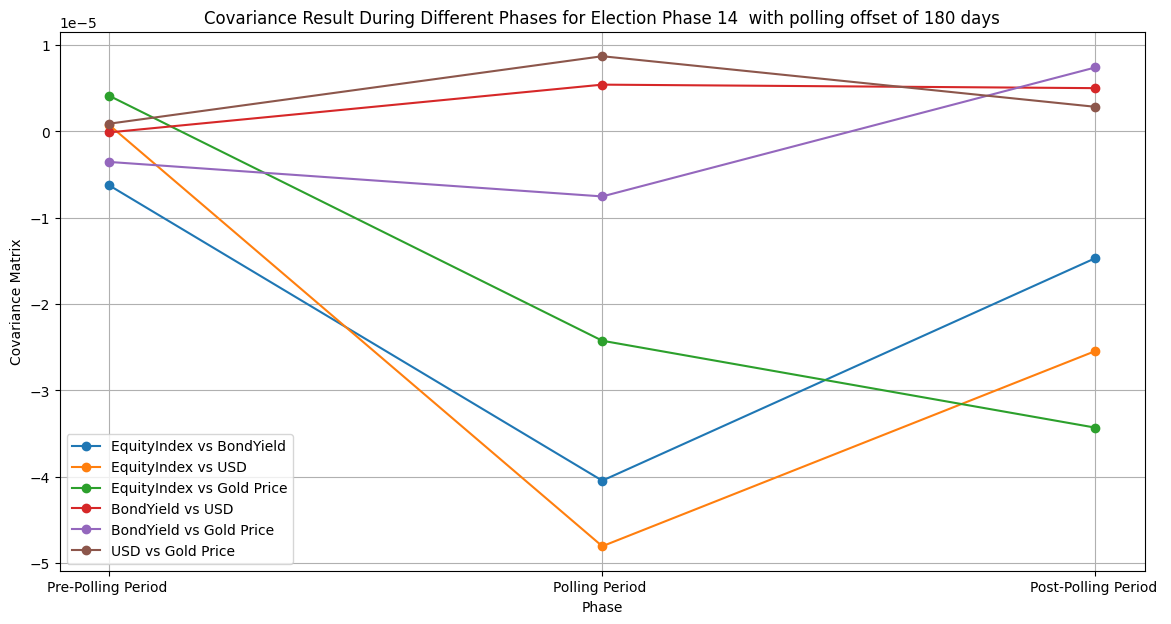

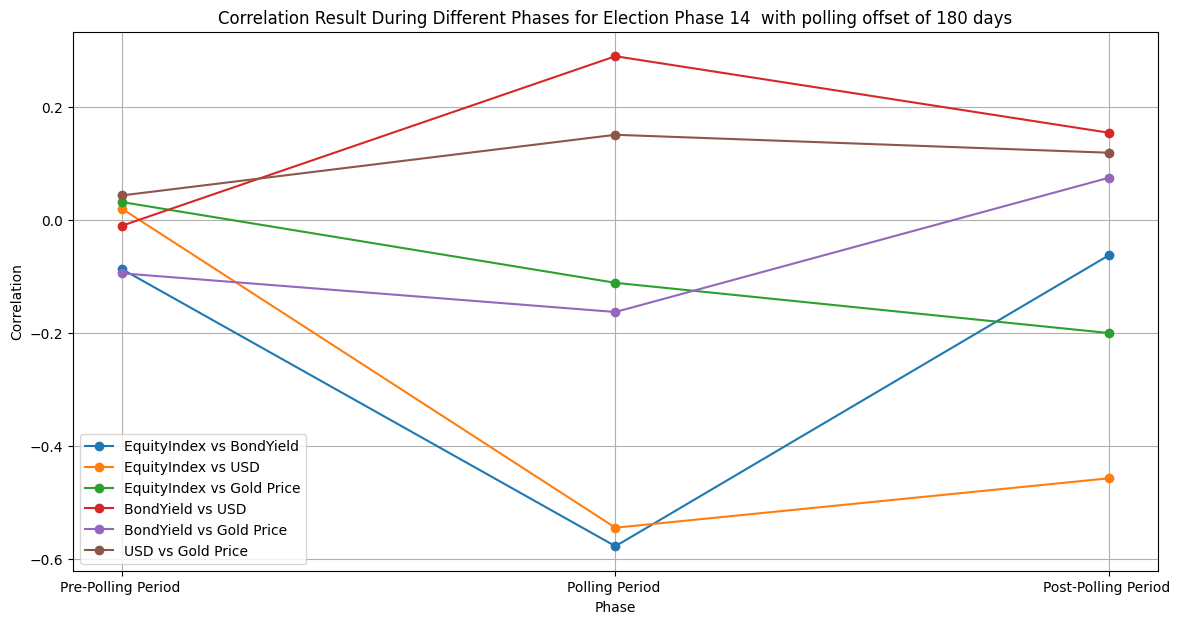

In [337]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [338]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.094673 0.758803
  BondYield                 0.332603 0.565112
        USD                12.098588 0.000684
 Gold Price                 7.528716 0.006917
Levenes Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                 0.153933 6.951532e-01
  BondYield                44.936625 1.441790e-10
        USD                 9.412632 2.402253e-03
 Gold Price                 0.222665 6.374451e-01


In [339]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.7417437205226377
P-value: 0.9999570146814151
Boxs M Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.7417437205226377
P-value: 0.9999570146814151


In [340]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -1.951248 -2.153677   -0.489665
BondYield      -1.951248        NaN  1.053007   -0.237790
USD            -2.153677   1.053007       NaN    0.370242
Gold_Price     -0.489665  -0.237790  0.370242         NaN 
 P-value =           0         1         2         3
0       NaN  0.051027  0.031266  0.624371
1  0.051027       NaN  0.292338  0.812044
2  0.031266  0.292338       NaN  0.711202
3  0.624371  0.812044  0.711202       NaN
Fisher's Z Test Result for Election Phase 14  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.189428 -3.941305   -1.799394
BondYield       0.189428        NaN  1.271772    1.300480
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 14 with 365 days pre & post polling period

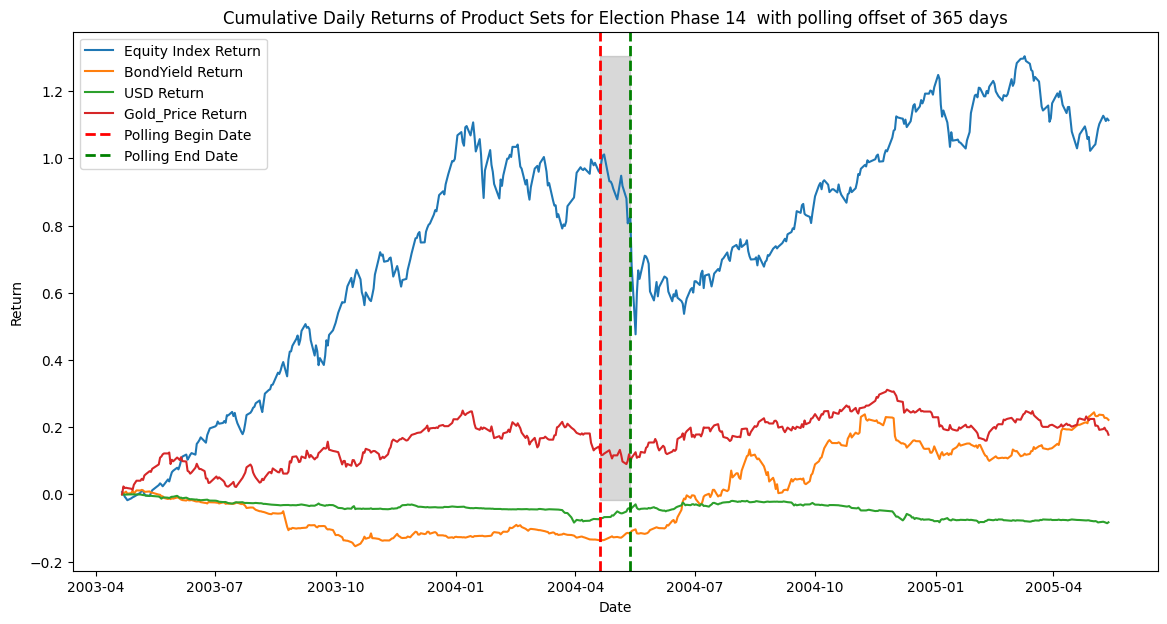

EquityIndex    506.0
BondYield      506.0
USD            506.0
Gold_Price     506.0
Name: count, dtype: float64
EquityIndex    244.0
BondYield      244.0
USD            244.0
Gold_Price     244.0
Name: count, dtype: float64
EquityIndex    16.0
BondYield      16.0
USD            16.0
Gold_Price     16.0
Name: count, dtype: float64
EquityIndex    246.0
BondYield      246.0
USD            246.0
Gold_Price     246.0
Name: count, dtype: float64


In [341]:
Offsetperioddays = 365
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 14  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 14   0.001600            0.015387  0.000237   
BondYield      Election Phase 14   0.000427            0.007936  0.000063   
USD            Election Phase 14  -0.000168            0.002547  0.000006   
Gold_Price     Election Phase 14   0.000361            0.008714  0.000076   
EquityIndex   Pre-Polling Period   0.002865            0.014361  0.000206   
BondYield     Pre-Polling Period  -0.000586            0.005132  0.000026   
USD           Pre-Polling Period  -0.000313            0.002094  0.000004   
Gold_Price    Pre-Polling Period   0.000589            0.009420  0.000089   
EquityIndex       Polling Period  -0.004277            0.018148  0.000329   
BondYield         Polling Period   0.001410            0.003857  0.000015   
USD               Polling Period   0.001783            0.004857  0.000024   
Gold_Price        Polling P

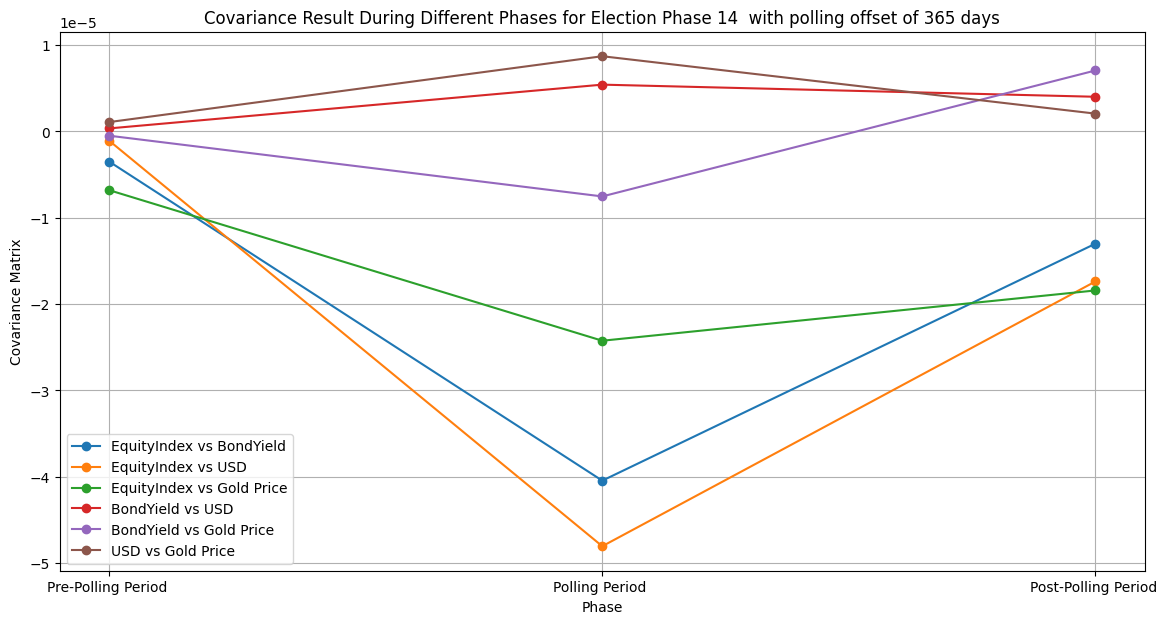

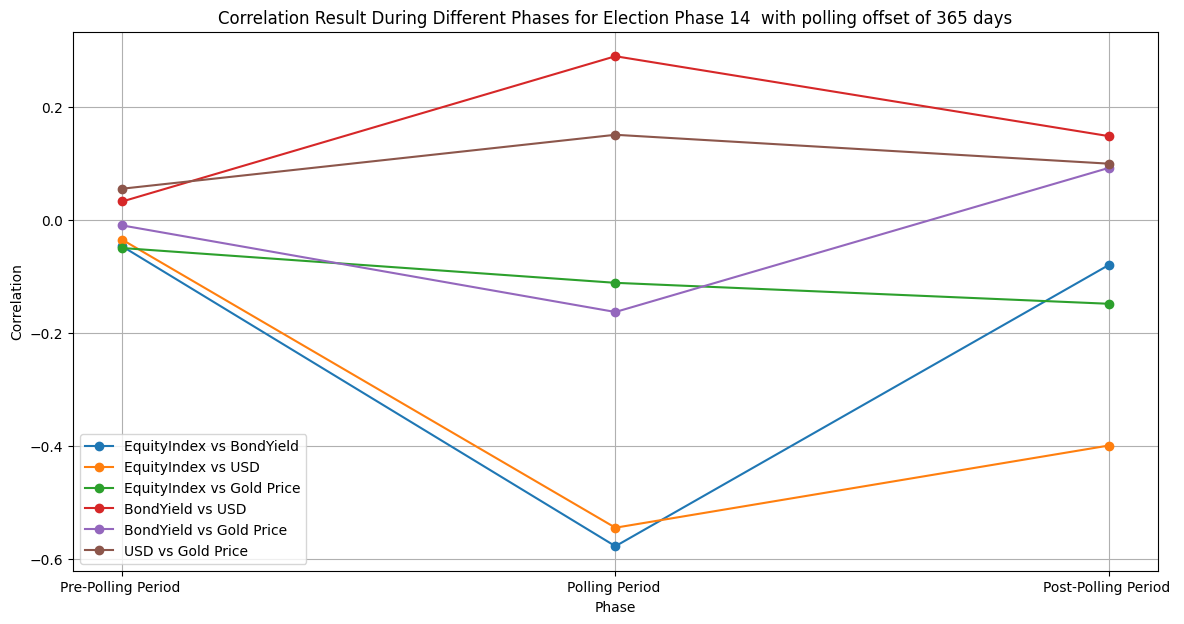

In [342]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [343]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.913192 0.340163
  BondYield                 0.170283 0.680203
        USD                20.776420 0.000008
 Gold Price                 4.096950 0.043991
Levenes Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                 0.756832 3.847495e-01
  BondYield                52.992388 1.348901e-12
        USD                21.134502 5.460595e-06
 Gold Price                 7.572327 6.147698e-03


In [344]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.9347789195812868
P-value: 0.9998738098423713
Boxs M Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.9347789195812868
P-value: 0.9998738098423713


In [345]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.148285 -2.021633   -0.217580
BondYield      -2.148285        NaN  0.932117   -0.543029
USD            -2.021633   0.932117       NaN    0.338788
Gold_Price     -0.217580  -0.543029  0.338788         NaN 
 P-value =           0         1         2         3
0       NaN  0.031691  0.043214  0.827757
1  0.031691       NaN  0.351276  0.587110
2  0.043214  0.351276       NaN  0.734769
3  0.827757  0.587110  0.734769       NaN
Fisher's Z Test Result for Election Phase 14  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -0.366512 -4.264263   -1.096071
BondYield      -0.366512        NaN  1.284310    1.120794
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


##Election Phase 15

In [346]:
NameA = 'Election Phase 15 '
NameB = "Pre-Polling Period "
NameC = "Polling Period "
NameD = "Post-Polling Period "
PollingBigin = pd.to_datetime('2009-04-16')
PollingEnd = pd.to_datetime('2009-05-16')

###Election Phase 15 with 90 days pre & post polling period

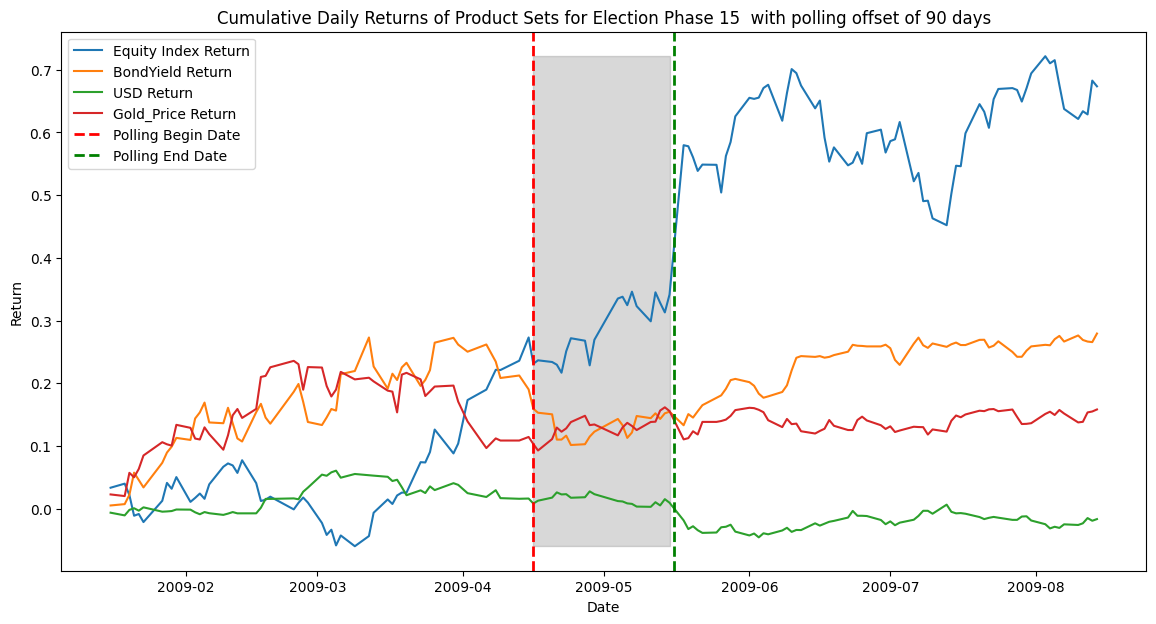

EquityIndex    138.0
BondYield      138.0
USD            138.0
Gold_Price     138.0
Name: count, dtype: float64
EquityIndex    53.0
BondYield      53.0
USD            53.0
Gold_Price     53.0
Name: count, dtype: float64
EquityIndex    20.0
BondYield      20.0
USD            20.0
Gold_Price     20.0
Name: count, dtype: float64
EquityIndex    65.0
BondYield      65.0
USD            65.0
Gold_Price     65.0
Name: count, dtype: float64


In [347]:
Offsetperioddays = 90
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 15  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 15   0.004058            0.025814  0.000666   
BondYield      Election Phase 15   0.001902            0.015271  0.000233   
USD            Election Phase 15  -0.000099            0.006665  0.000044   
Gold_Price     Election Phase 15   0.001159            0.013737  0.000189   
EquityIndex   Pre-Polling Period   0.004809            0.022304  0.000497   
BondYield     Pre-Polling Period   0.003515            0.021340  0.000455   
USD           Pre-Polling Period   0.000328            0.006902  0.000048   
Gold_Price    Pre-Polling Period   0.002226            0.019168  0.000367   
EquityIndex       Polling Period   0.002870            0.022840  0.000522   
BondYield         Polling Period  -0.001422            0.014124  0.000199   
USD               Polling Period  -0.000315            0.005931  0.000035   
Gold_Price        Polling P

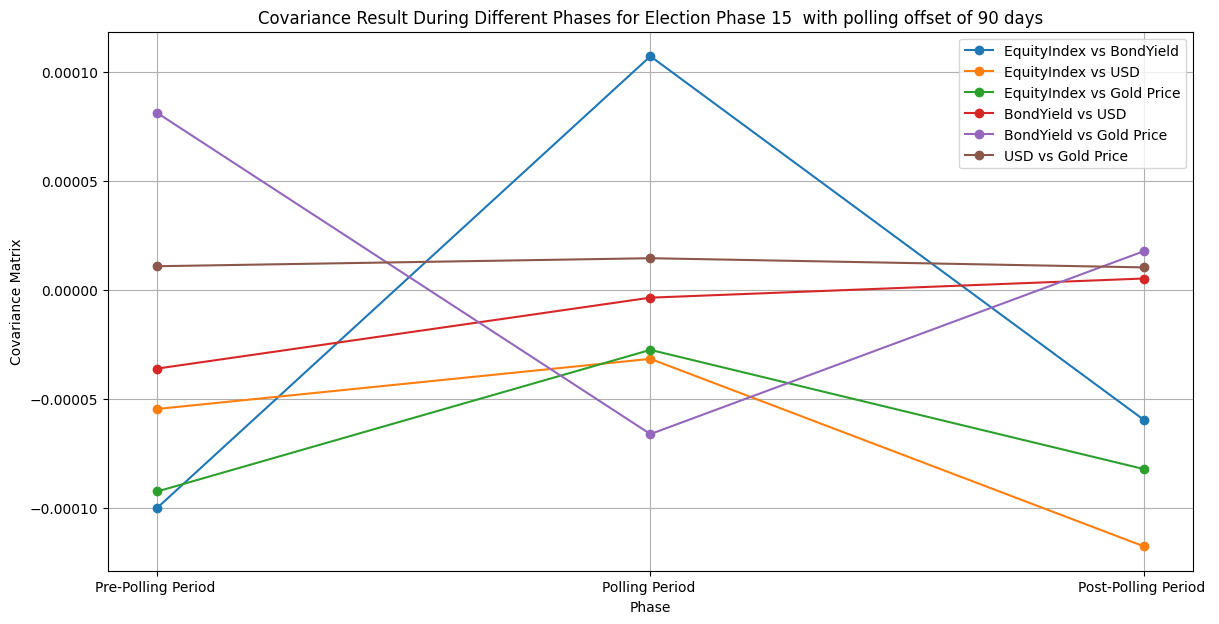

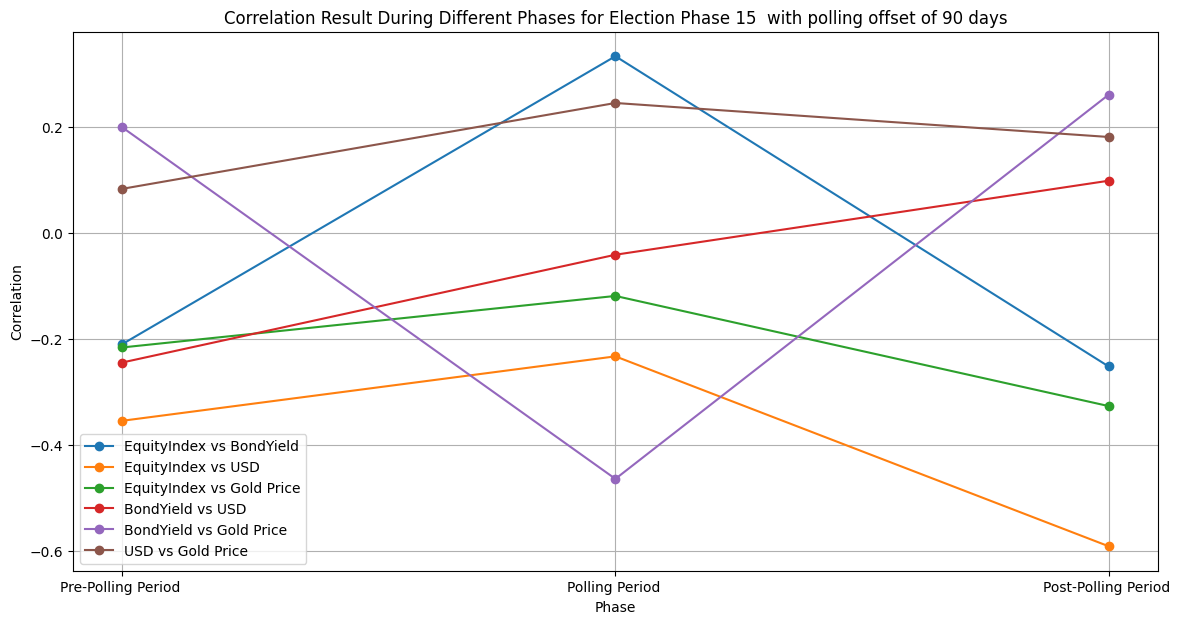

In [348]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [349]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.013451 0.907997
  BondYield                 4.078604 0.047205
        USD                 0.147710 0.701882
 Gold Price                 4.519729 0.036985
Levenes Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                 0.016189 8.989743e-01
  BondYield                38.655623 8.218182e-09
        USD                 0.013489 9.077411e-01
 Gold Price                25.005616 2.049046e-06


In [350]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.9650779419690956
P-value: 0.9998538244954509
Boxs M Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.9650779419690956
P-value: 0.9998538244954509


In [351]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   1.992866  0.474695    0.356412
BondYield       1.992866        NaN  0.742070   -2.508642
USD             0.474695   0.742070       NaN    0.594198
Gold_Price      0.356412  -2.508642  0.594198         NaN 
 P-value =           0         1         2         3
0       NaN  0.046276  0.635005  0.721532
1  0.046276       NaN  0.458045  0.012120
2  0.635005  0.458045       NaN  0.552380
3  0.721532  0.012120  0.552380       NaN
Fisher's Z Test Result for Election Phase 15  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -0.233486 -1.624860   -0.628853
BondYield      -0.233486        NaN  1.832251    0.341215
USD          

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 15 with 180 days pre & post polling period

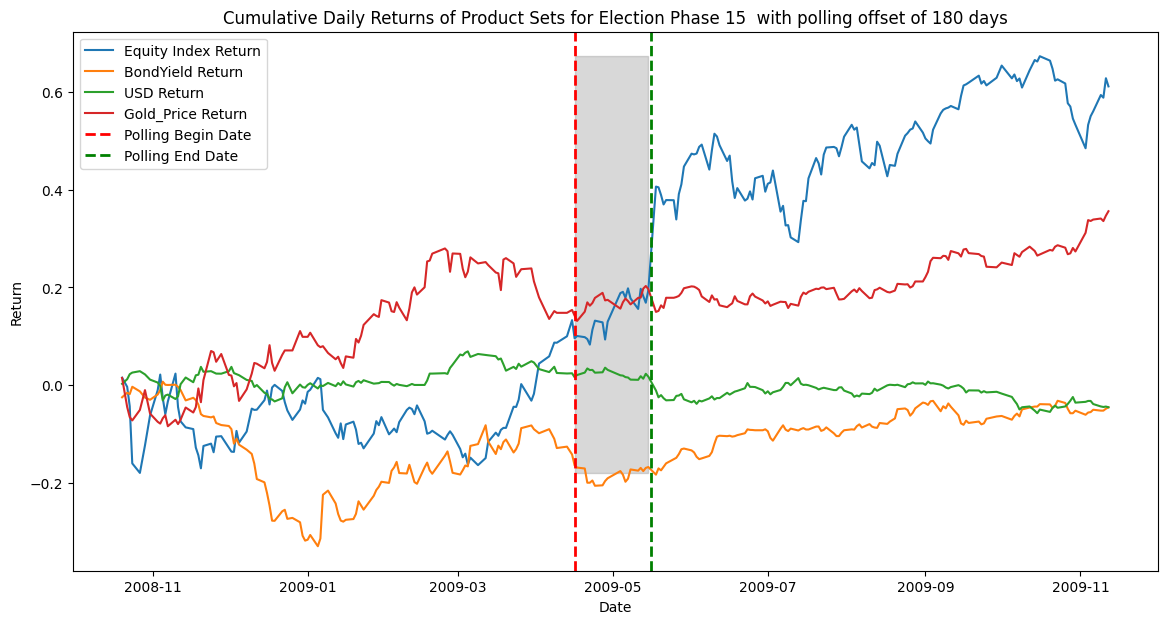

EquityIndex    250.0
BondYield      250.0
USD            250.0
Gold_Price     250.0
Name: count, dtype: float64
EquityIndex    109.0
BondYield      109.0
USD            109.0
Gold_Price     109.0
Name: count, dtype: float64
EquityIndex    20.0
BondYield      20.0
USD            20.0
Gold_Price     20.0
Name: count, dtype: float64
EquityIndex    121.0
BondYield      121.0
USD            121.0
Gold_Price     121.0
Name: count, dtype: float64


In [352]:
Offsetperioddays = 180
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 15  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 15   0.002259            0.026684  0.000712   
BondYield      Election Phase 15  -0.000044            0.016880  0.000285   
USD            Election Phase 15  -0.000156            0.007333  0.000054   
Gold_Price     Election Phase 15   0.001341            0.015715  0.000247   
EquityIndex   Pre-Polling Period   0.001614            0.030523  0.000932   
BondYield     Pre-Polling Period  -0.001132            0.023342  0.000545   
USD           Pre-Polling Period   0.000262            0.008795  0.000077   
Gold_Price    Pre-Polling Period   0.001549            0.021733  0.000472   
EquityIndex       Polling Period   0.002870            0.022840  0.000522   
BondYield         Polling Period  -0.001422            0.014124  0.000199   
USD               Polling Period  -0.000315            0.005931  0.000035   
Gold_Price        Polling P

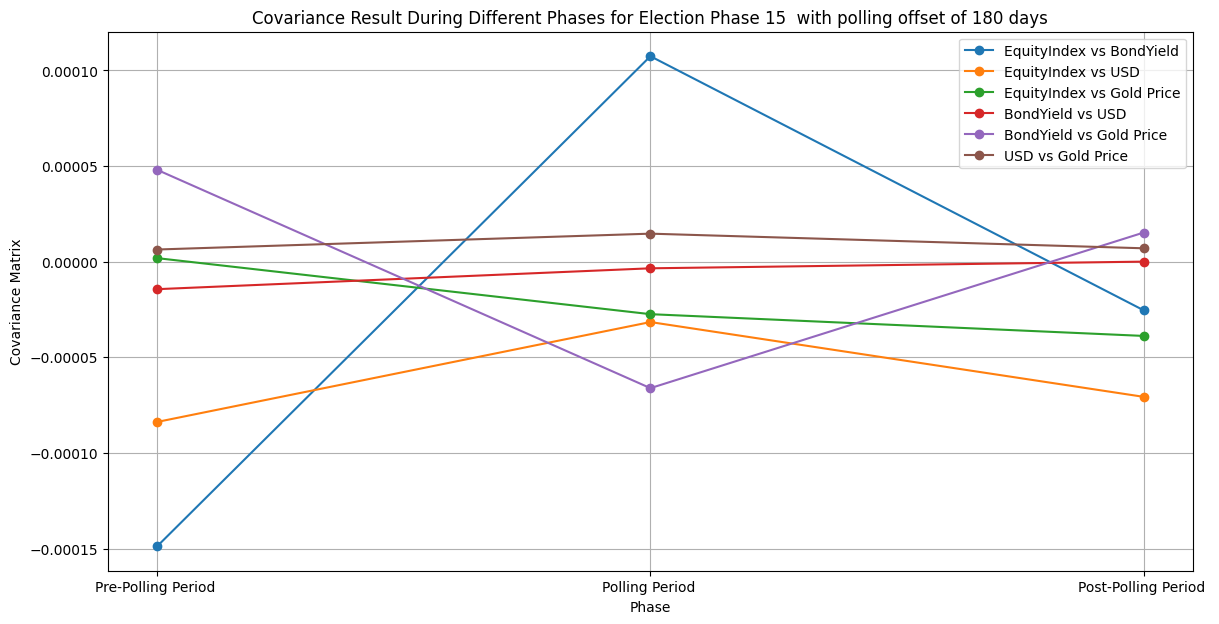

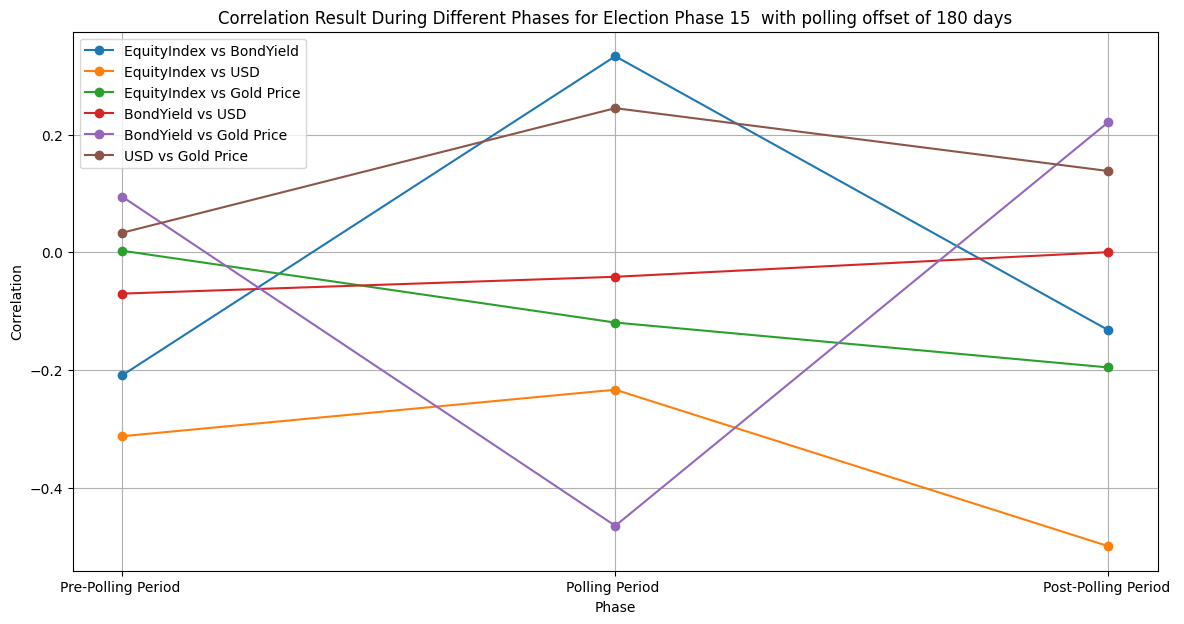

In [353]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [354]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 1.603313 0.207752
  BondYield                 2.455356 0.119613
        USD                 2.001326 0.159609
 Gold Price                 6.448993 0.012308
Levenes Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                13.207170 3.446212e-04
  BondYield                42.114671 5.302112e-10
        USD                 9.508831 2.297105e-03
 Gold Price                58.551080 5.543722e-13


In [355]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 1.2696789818286338
P-value: 0.9994916282878749
Boxs M Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 1.2696789818286338
P-value: 0.9994916282878749


In [356]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   2.136326  0.326968   -0.468996
BondYield       2.136326        NaN  0.109764   -2.287476
USD             0.326968   0.109764       NaN    0.829128
Gold_Price     -0.468996  -2.287476  0.829128         NaN 
 P-value =           0         1         2         3
0       NaN  0.032653  0.743692  0.639073
1  0.032653       NaN  0.912596  0.022168
2  0.743692  0.912596       NaN  0.407032
3  0.639073  0.022168  0.407032       NaN
Fisher's Z Test Result for Election Phase 15  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.590333 -1.680778   -1.499878
BondYield       0.590333        NaN  0.527026    0.972394
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 15 with 365 days pre & post polling period

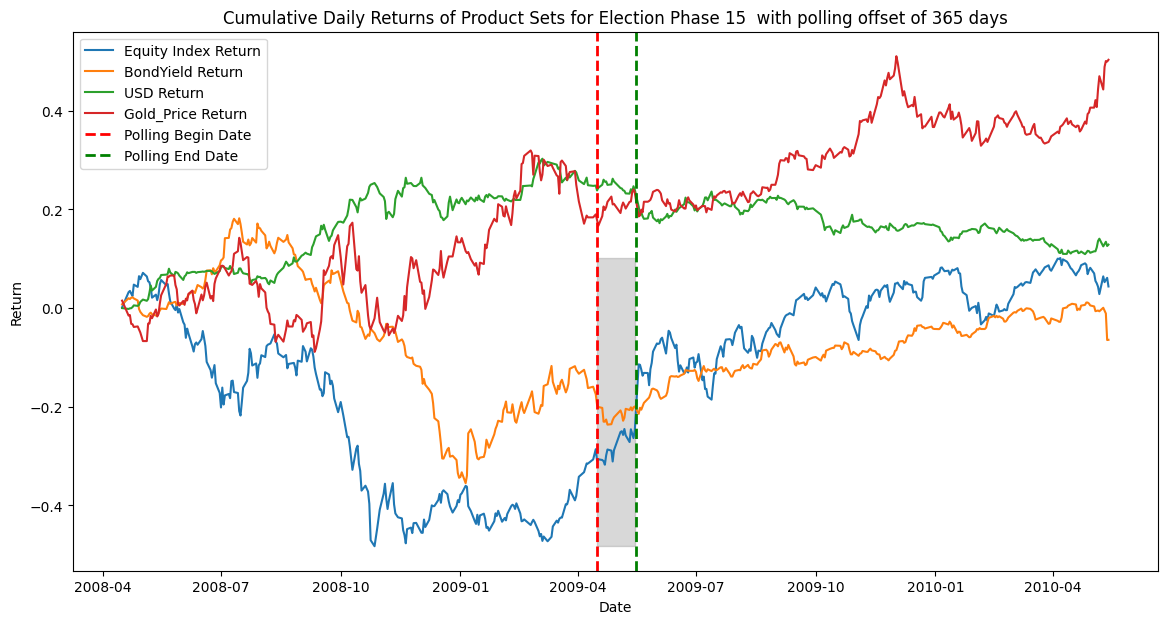

EquityIndex    493.0
BondYield      493.0
USD            493.0
Gold_Price     493.0
Name: count, dtype: float64
EquityIndex    232.0
BondYield      232.0
USD            232.0
Gold_Price     232.0
Name: count, dtype: float64
EquityIndex    20.0
BondYield      20.0
USD            20.0
Gold_Price     20.0
Name: count, dtype: float64
EquityIndex    241.0
BondYield      241.0
USD            241.0
Gold_Price     241.0
Name: count, dtype: float64


In [357]:
Offsetperioddays = 365
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 15  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 15   0.000351            0.023099  0.000534   
BondYield      Election Phase 15  -0.000043            0.013646  0.000186   
USD            Election Phase 15   0.000267            0.006499  0.000042   
Gold_Price     Election Phase 15   0.000960            0.016288  0.000265   
EquityIndex   Pre-Polling Period  -0.001081            0.027201  0.000740   
BondYield     Pre-Polling Period  -0.000673            0.017763  0.000316   
USD           Pre-Polling Period   0.000985            0.007600  0.000058   
Gold_Price    Pre-Polling Period   0.000979            0.021461  0.000461   
EquityIndex       Polling Period   0.002870            0.022840  0.000522   
BondYield         Polling Period  -0.001422            0.014124  0.000199   
USD               Polling Period  -0.000315            0.005931  0.000035   
Gold_Price        Polling P

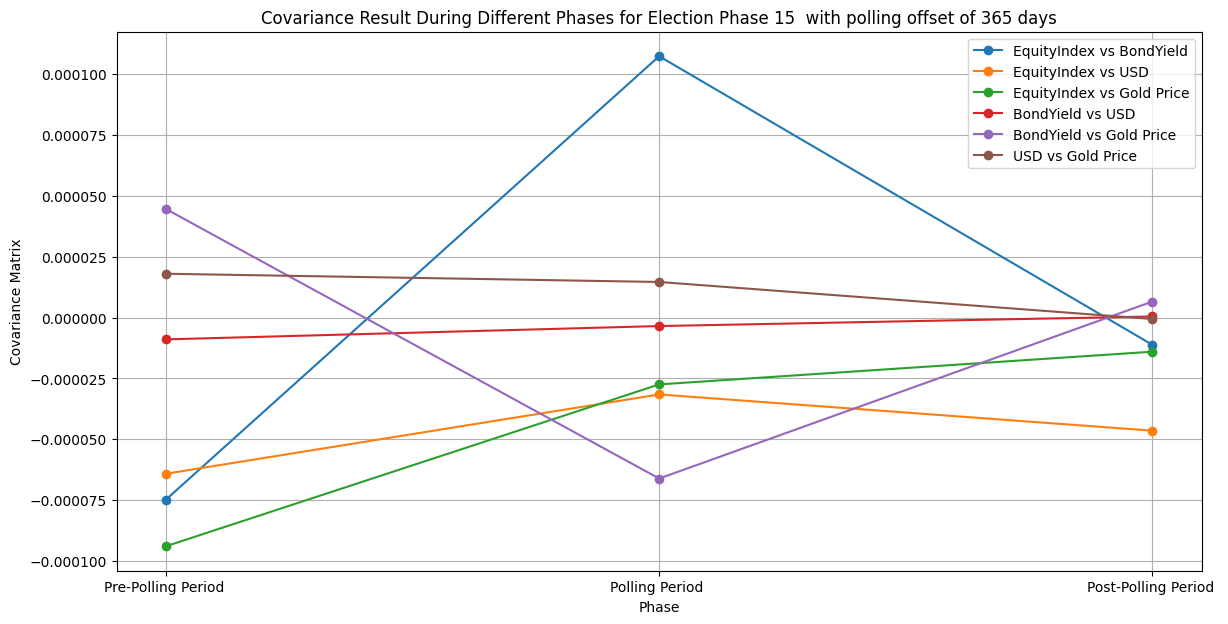

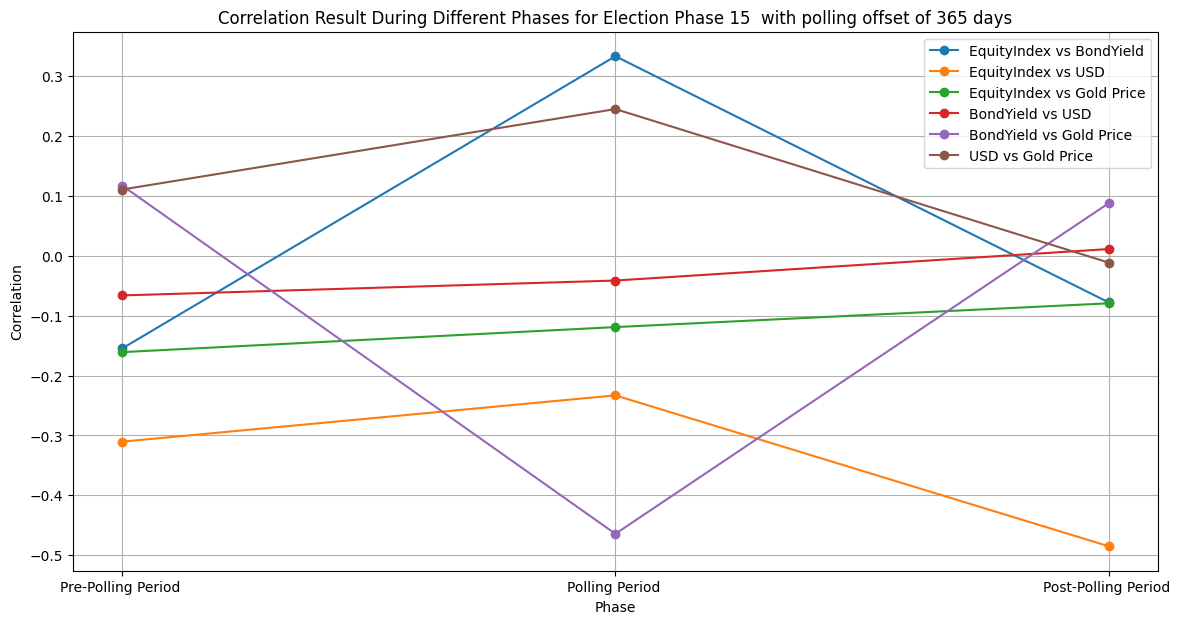

In [358]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [359]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.594084 0.441572
  BondYield                 0.289586 0.590965
        USD                 0.746817 0.388314
 Gold Price                 5.144473 0.024174
Levenes Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                43.648021 1.064923e-10
  BondYield                53.287061 1.235364e-12
        USD                19.672329 1.145375e-05
 Gold Price                75.376050 6.410727e-17


In [360]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.9408002708438878
P-value: 0.9998700156243953
Boxs M Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.9408002708438878
P-value: 0.9998700156243953


In [361]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   1.997973  0.332269    0.169517
BondYield       1.997973        NaN  0.099205   -2.467632
USD             0.332269   0.099205       NaN    0.552647
Gold_Price      0.169517  -2.467632  0.552647         NaN 
 P-value =           0         1         2         3
0       NaN  0.045720  0.739686  0.865390
1  0.045720       NaN  0.920976  0.013601
2  0.739686  0.920976       NaN  0.580505
3  0.865390  0.013601  0.580505       NaN
Fisher's Z Test Result for Election Phase 15  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.842777 -2.251684    0.893598
BondYield       0.842777        NaN  0.837538   -0.321987
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


##Election Phase 16

In [362]:
NameA = 'Election Phase 16 '
NameB = "Pre-Polling Period "
NameC = "Polling Period "
NameD = "Post-Polling Period "
PollingBigin = pd.to_datetime('2014-04-07')
PollingEnd = pd.to_datetime('2014-05-16')

###Election Phase 16 with 90 days pre & post polling period

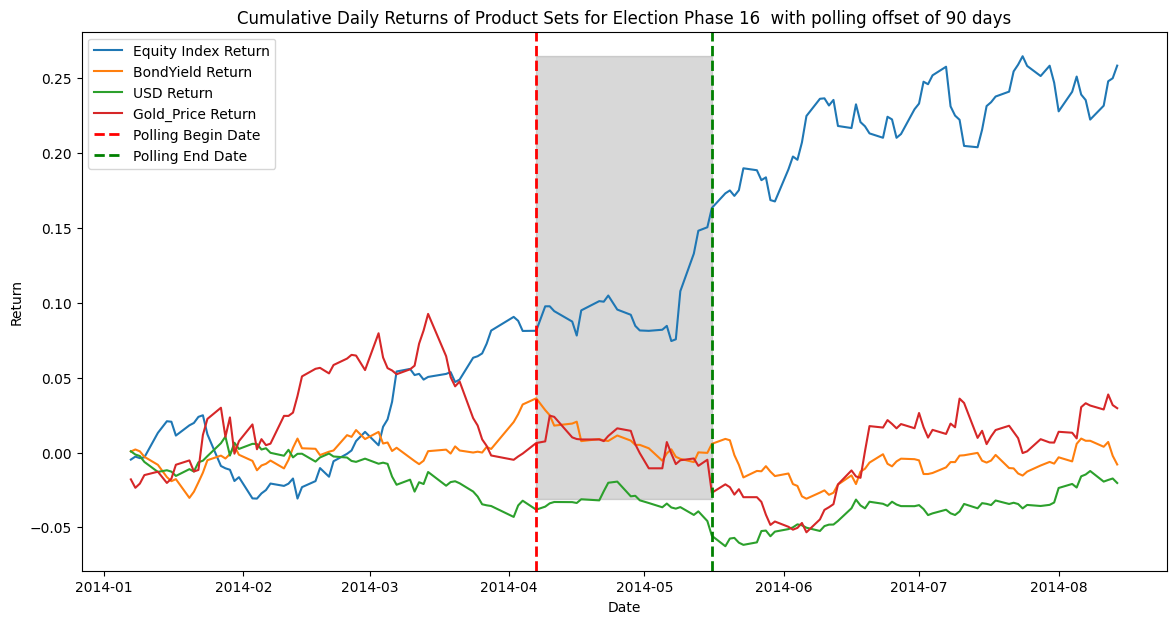

EquityIndex    145.0
BondYield      145.0
USD            145.0
Gold_Price     145.0
Name: count, dtype: float64
EquityIndex    58.0
BondYield      58.0
USD            58.0
Gold_Price     58.0
Name: count, dtype: float64
EquityIndex    24.0
BondYield      24.0
USD            24.0
Gold_Price     24.0
Name: count, dtype: float64
EquityIndex    63.0
BondYield      63.0
USD            63.0
Gold_Price     63.0
Name: count, dtype: float64


In [363]:
Offsetperioddays = 90
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 16  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 16   0.001621            0.008357  0.000070   
BondYield      Election Phase 16  -0.000043            0.004962  0.000025   
USD            Election Phase 16  -0.000133            0.004143  0.000017   
Gold_Price     Election Phase 16   0.000242            0.009093  0.000083   
EquityIndex   Pre-Polling Period   0.001375            0.007465  0.000056   
BondYield     Pre-Polling Period   0.000559            0.005382  0.000029   
USD           Pre-Polling Period  -0.000553            0.004629  0.000021   
Gold_Price    Pre-Polling Period   0.000045            0.010726  0.000115   
EquityIndex       Polling Period   0.003105            0.010124  0.000102   
BondYield         Polling Period  -0.001064            0.004753  0.000023   
USD               Polling Period  -0.001011            0.004327  0.000019   
Gold_Price        Polling P

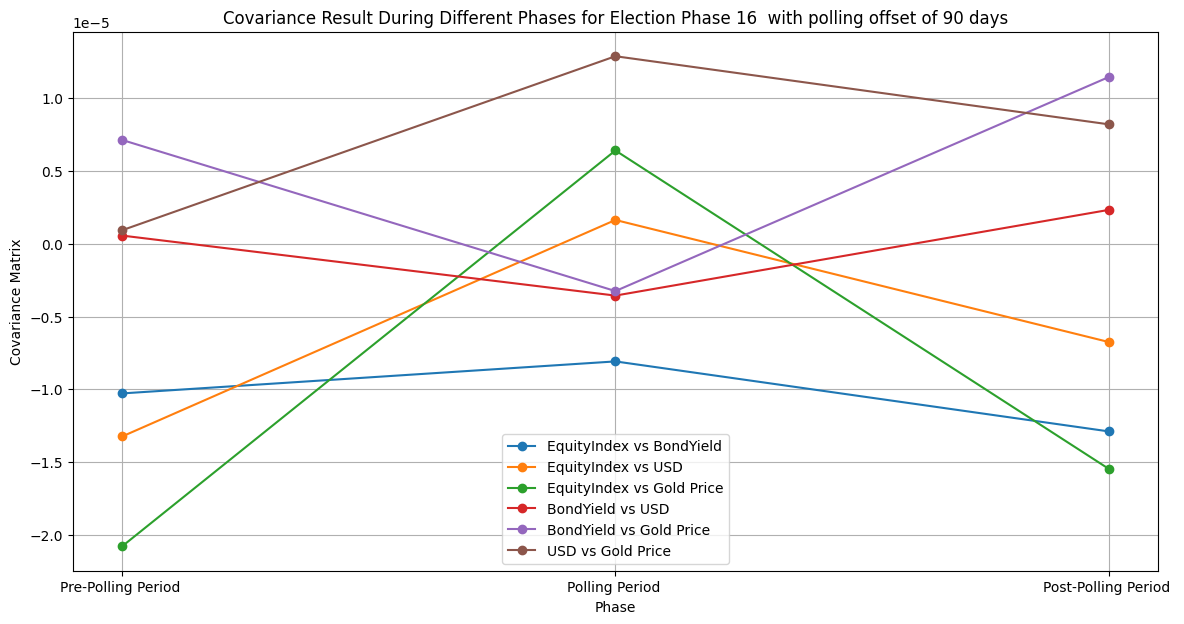

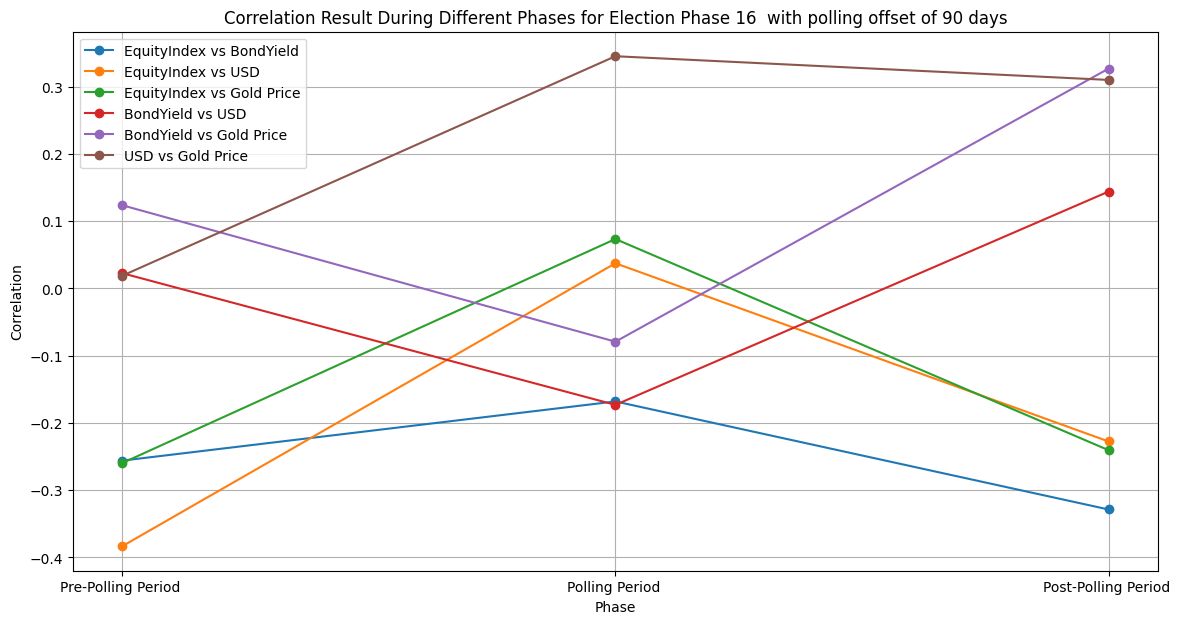

In [364]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [365]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 1.649504 0.202733
  BondYield                 0.540613 0.464329
        USD                 0.202933 0.653582
 Gold Price                 1.440444 0.233609
Levenes Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 2.338490 0.128866
  BondYield                 1.044129 0.308936
        USD                 3.682310 0.057388
 Gold Price                 4.097975 0.045174


In [366]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.3868191152094496
P-value: 0.9999980796779413
Boxs M Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.3868191152094496
P-value: 0.9999980796779413


In [367]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.359440  1.720555    1.322818
BondYield       0.359440        NaN -0.770158   -0.793922
USD             1.720555  -0.770158       NaN    1.329971
Gold_Price      1.322818  -0.793922  1.329971         NaN 
 P-value =           0         1         2         3
0       NaN  0.719266  0.085332  0.185896
1  0.719266       NaN  0.441206  0.427241
2  0.085332  0.441206       NaN  0.183528
3  0.185896  0.427241  0.183528       NaN
Fisher's Z Test Result for Election Phase 16  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -0.425862  0.922972    0.109328
BondYield      -0.425862        NaN  0.655435    1.151526
USD          

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 16 with 180 days pre & post polling period

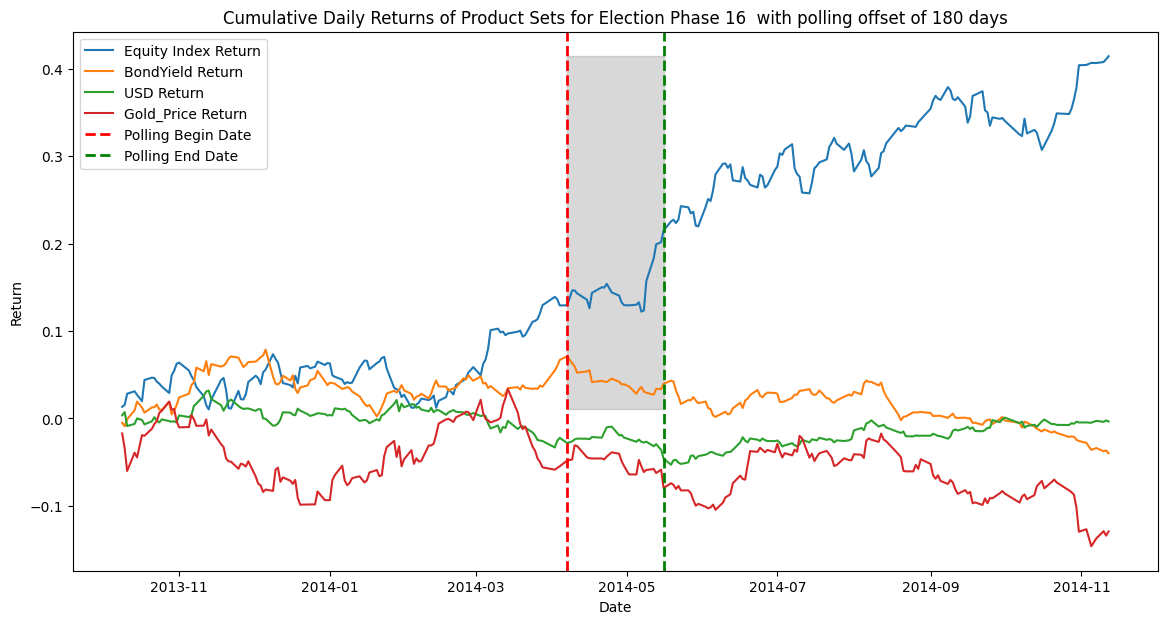

EquityIndex    258.0
BondYield      258.0
USD            258.0
Gold_Price     258.0
Name: count, dtype: float64
EquityIndex    118.0
BondYield      118.0
USD            118.0
Gold_Price     118.0
Name: count, dtype: float64
EquityIndex    24.0
BondYield      24.0
USD            24.0
Gold_Price     24.0
Name: count, dtype: float64
EquityIndex    116.0
BondYield      116.0
USD            116.0
Gold_Price     116.0
Name: count, dtype: float64


In [368]:
Offsetperioddays = 180
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 16  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 16   0.001380            0.008505  0.000072   
BondYield      Election Phase 16  -0.000142            0.005574  0.000031   
USD            Election Phase 16  -0.000005            0.004136  0.000017   
Gold_Price     Election Phase 16  -0.000489            0.009671  0.000094   
EquityIndex   Pre-Polling Period   0.001067            0.008577  0.000074   
BondYield     Pre-Polling Period   0.000571            0.006598  0.000044   
USD           Pre-Polling Period  -0.000179            0.004787  0.000023   
Gold_Price    Pre-Polling Period  -0.000415            0.011093  0.000123   
EquityIndex       Polling Period   0.003105            0.010124  0.000102   
BondYield         Polling Period  -0.001064            0.004753  0.000023   
USD               Polling Period  -0.001011            0.004327  0.000019   
Gold_Price        Polling P

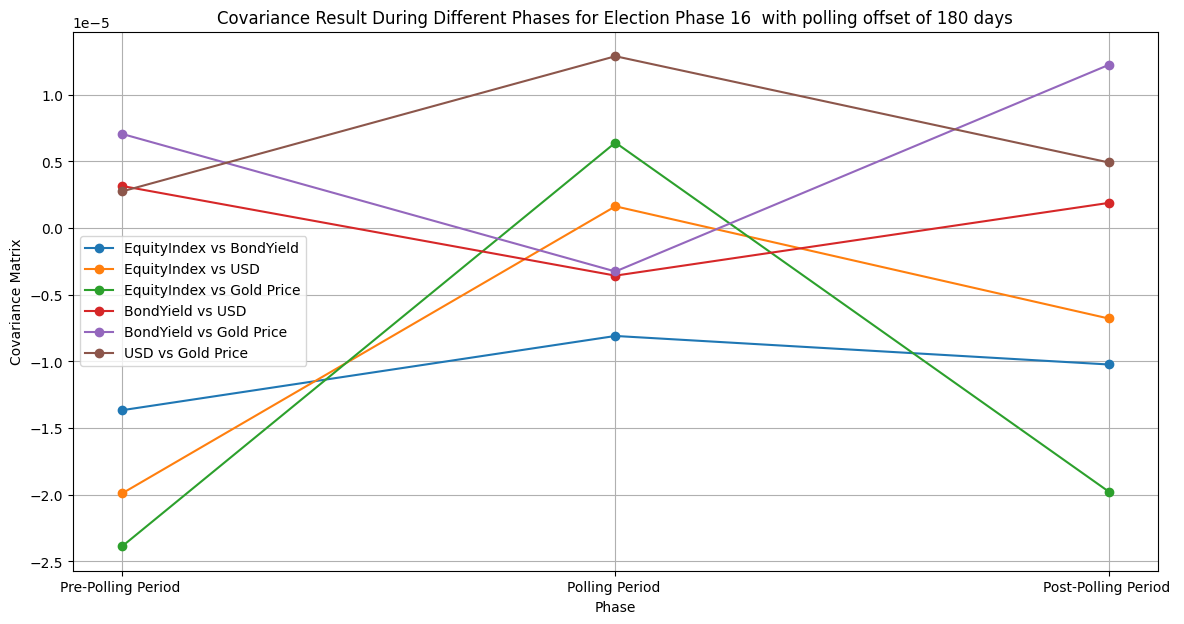

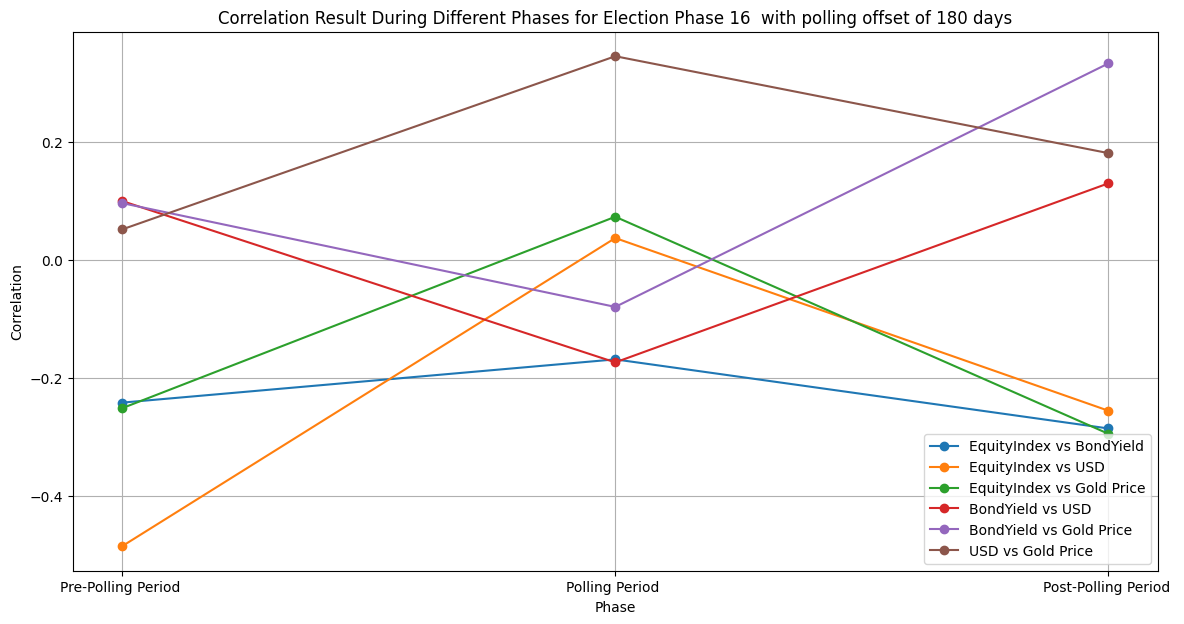

In [369]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [370]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.263600 0.608467
  BondYield                 2.032908 0.156152
        USD                 0.303660 0.582475
 Gold Price                 2.300428 0.131593
Levenes Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.131637 0.717071
  BondYield                11.774338 0.000711
        USD                11.146220 0.000981
 Gold Price                 6.204660 0.013442


In [371]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.4645823600114833
P-value: 0.999995353254573
Boxs M Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.4645823600114833
P-value: 0.999995353254573


In [372]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.322293  2.385581    1.389605
BondYield       0.322293        NaN -1.160217   -0.742682
USD             2.385581  -1.160217       NaN    1.297859
Gold_Price      1.389605  -0.742682  1.297859         NaN 
 P-value =           0         1         2         3
0       NaN  0.747230  0.017052  0.164649
1  0.747230       NaN  0.245961  0.457674
2  0.017052  0.245961       NaN  0.194336
3  0.164649  0.457674  0.194336       NaN
Fisher's Z Test Result for Election Phase 16  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -0.354989  2.022888   -0.353454
BondYield      -0.354989        NaN  0.229514    1.882879
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 16 with 365 days pre & post polling period

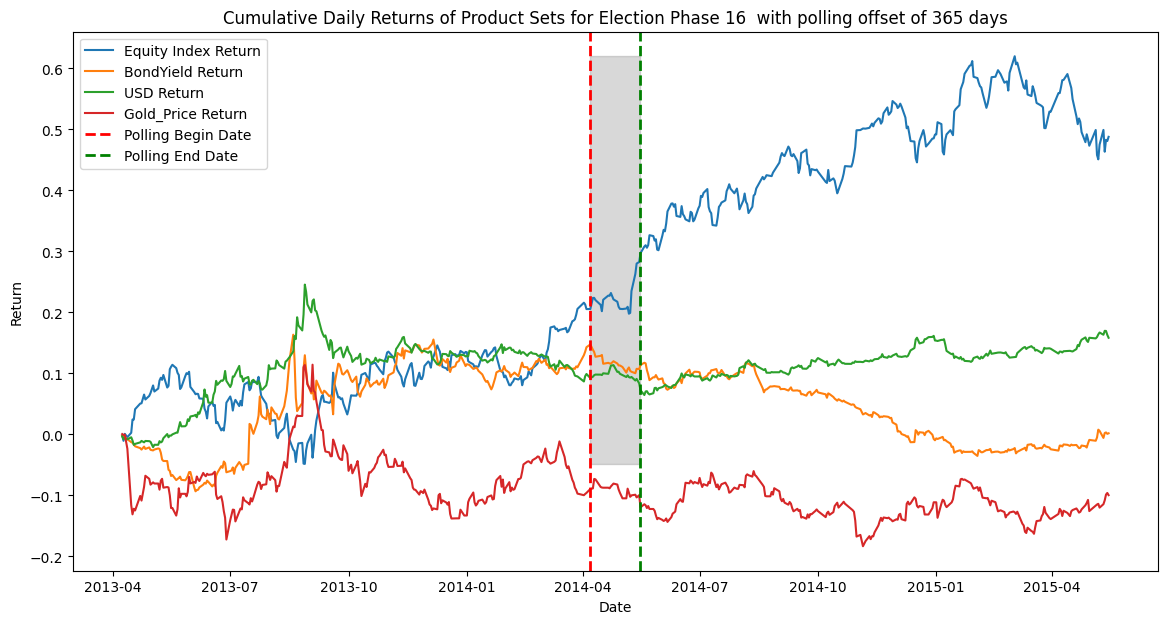

EquityIndex    503.0
BondYield      503.0
USD            503.0
Gold_Price     503.0
Name: count, dtype: float64
EquityIndex    242.0
BondYield      242.0
USD            242.0
Gold_Price     242.0
Name: count, dtype: float64
EquityIndex    24.0
BondYield      24.0
USD            24.0
Gold_Price     24.0
Name: count, dtype: float64
EquityIndex    237.0
BondYield      237.0
USD            237.0
Gold_Price     237.0
Name: count, dtype: float64


In [373]:
Offsetperioddays = 365
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 16  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 16   0.000844            0.010357  0.000107   
BondYield      Election Phase 16   0.000045            0.009111  0.000083   
USD            Election Phase 16   0.000310            0.005941  0.000035   
Gold_Price     Election Phase 16  -0.000128            0.012654  0.000160   
EquityIndex   Pre-Polling Period   0.000838            0.011468  0.000132   
BondYield     Pre-Polling Period   0.000627            0.012290  0.000151   
USD           Pre-Polling Period   0.000421            0.007812  0.000061   
Gold_Price    Pre-Polling Period  -0.000288            0.016015  0.000256   
EquityIndex       Polling Period   0.003105            0.010124  0.000102   
BondYield         Polling Period  -0.001064            0.004753  0.000023   
USD               Polling Period  -0.001011            0.004327  0.000019   
Gold_Price        Polling P

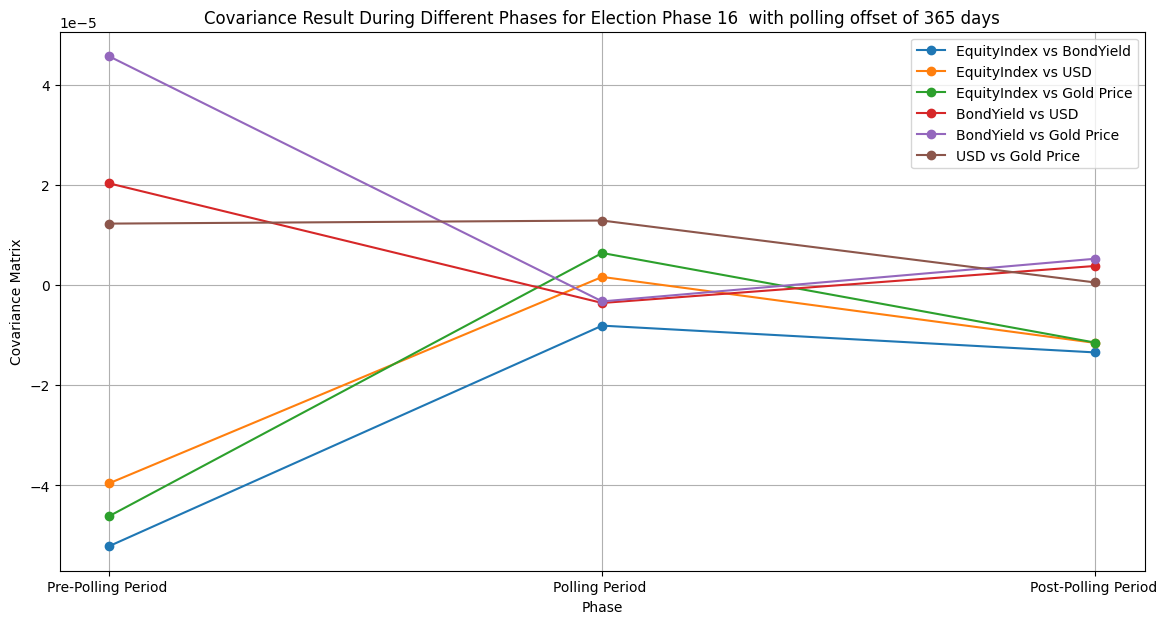

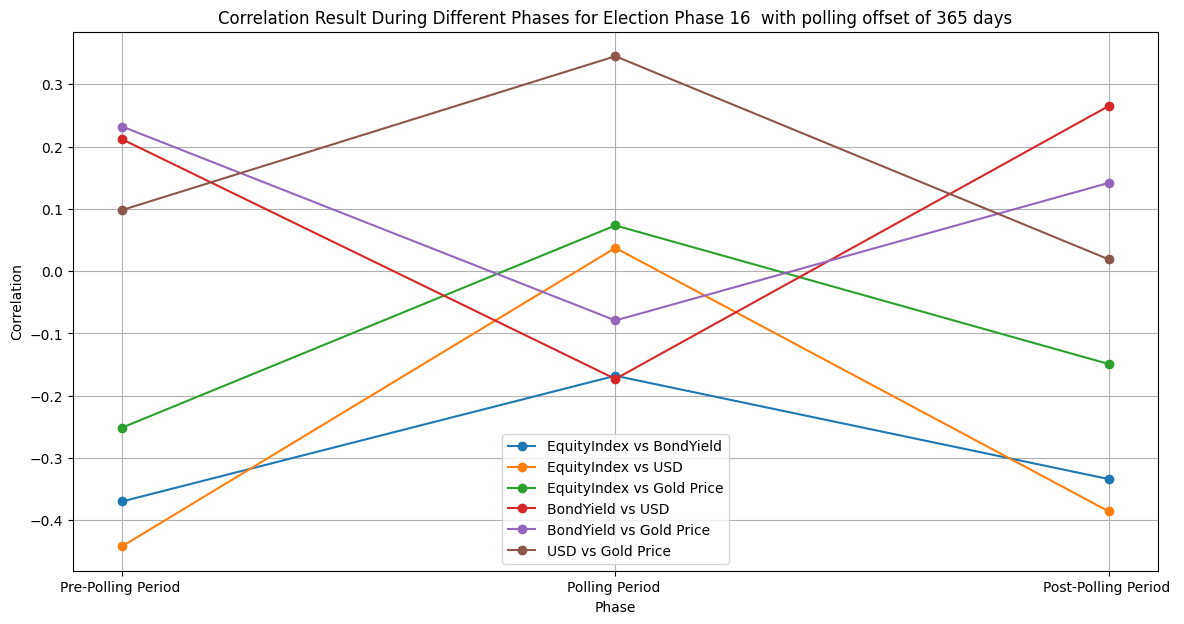

In [374]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [375]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.537589 0.464084
  BondYield                 4.222239 0.040882
        USD                 3.406608 0.066055
 Gold Price                 3.602263 0.058792
Levenes Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                 5.065905 2.485561e-02
  BondYield                47.626268 1.648941e-11
        USD                56.504847 2.797485e-13
 Gold Price                25.596025 6.016701e-07


In [376]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 1.4298048674075619
P-value: 0.9991377911524075
Boxs M Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 1.4298048674075619
P-value: 0.9991377911524075


In [377]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.960445  2.249064    1.451074
BondYield       0.960445        NaN -1.713186   -1.387996
USD             2.249064  -1.713186       NaN    1.148862
Gold_Price      1.451074  -1.387996  1.148862         NaN 
 P-value =           0         1         2         3
0       NaN  0.336831  0.024508  0.146759
1  0.336831       NaN  0.086678  0.165138
2  0.024508  0.086678       NaN  0.250613
3  0.146759  0.165138  0.250613       NaN
Fisher's Z Test Result for Election Phase 16  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.446206  0.736511    1.158320
BondYield       0.446206        NaN  0.615221   -1.020943
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


##Election Phase 17

In [378]:
NameA = 'Election Phase 17 '
NameB = "Pre-Polling Period "
NameC = "Polling Period "
NameD = "Post-Polling Period "
PollingBigin = pd.to_datetime('2019-04-11')
PollingEnd = pd.to_datetime('2019-05-23')

###Election Phase 17 with 90 days pre & post polling period

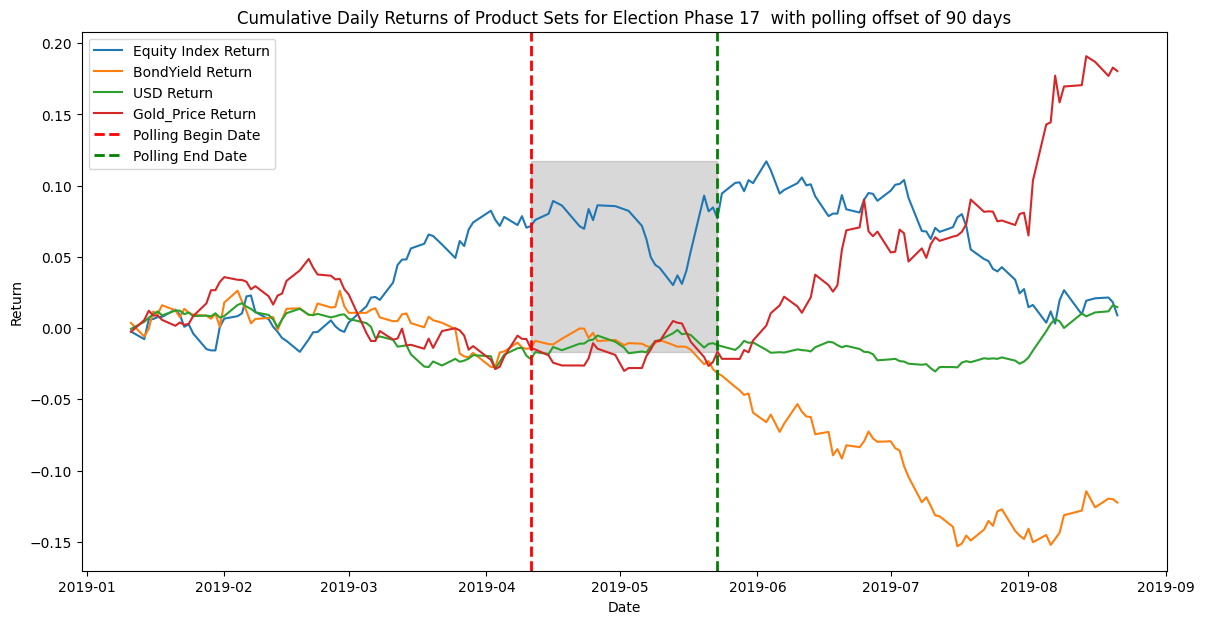

EquityIndex    148.0
BondYield      148.0
USD            148.0
Gold_Price     148.0
Name: count, dtype: float64
EquityIndex    60.0
BondYield      60.0
USD            60.0
Gold_Price     60.0
Name: count, dtype: float64
EquityIndex    27.0
BondYield      27.0
USD            27.0
Gold_Price     27.0
Name: count, dtype: float64
EquityIndex    61.0
BondYield      61.0
USD            61.0
Gold_Price     61.0
Name: count, dtype: float64


In [379]:
Offsetperioddays = 90
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 17  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 17   0.000093            0.008105  0.000066   
BondYield      Election Phase 17  -0.000859            0.006939  0.000048   
USD            Election Phase 17   0.000104            0.003409  0.000012   
Gold_Price     Election Phase 17   0.001161            0.008934  0.000080   
EquityIndex   Pre-Polling Period   0.001158            0.006676  0.000045   
BondYield     Pre-Polling Period  -0.000225            0.006339  0.000040   
USD           Pre-Polling Period  -0.000319            0.003615  0.000013   
Gold_Price    Pre-Polling Period  -0.000106            0.006726  0.000045   
EquityIndex       Polling Period   0.000286            0.010641  0.000113   
BondYield         Polling Period  -0.000642            0.003858  0.000015   
USD               Polling Period   0.000286            0.003461  0.000012   
Gold_Price        Polling P

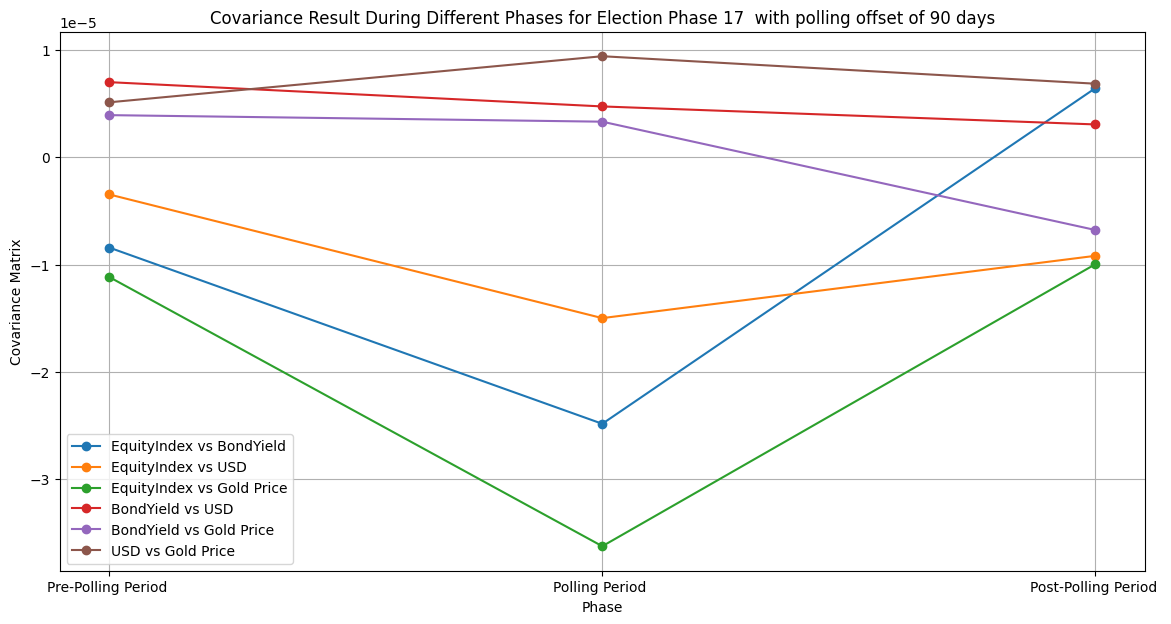

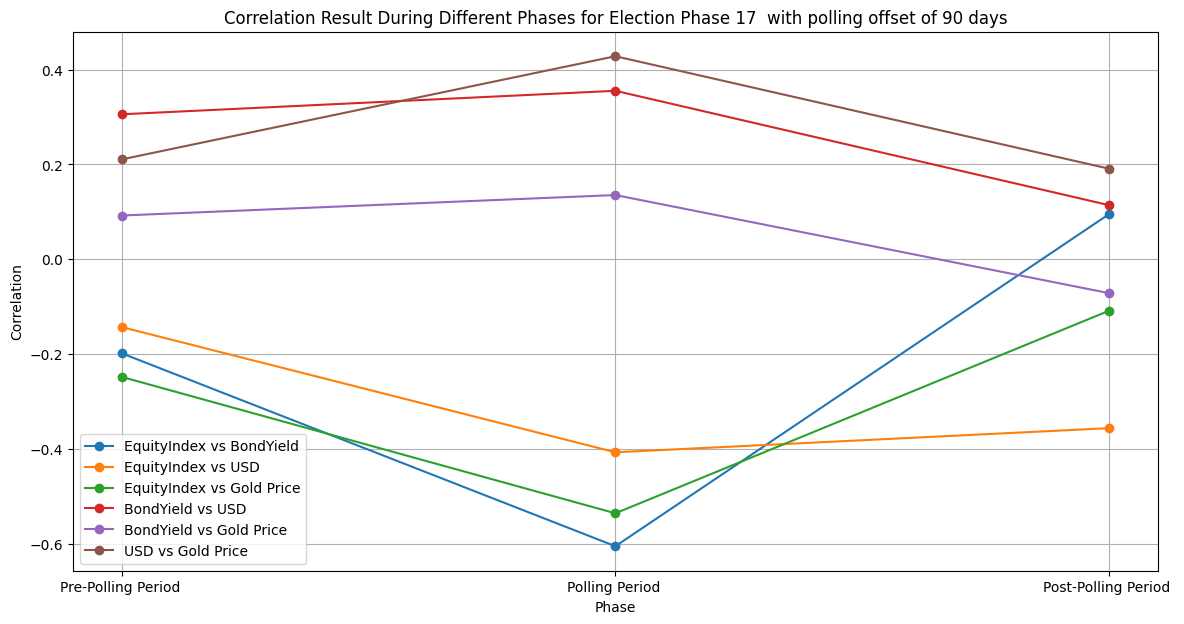

In [380]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [381]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 2.971891 0.088358
  BondYield                 5.272637 0.024124
        USD                 0.072196 0.788817
 Gold Price                 0.012185 0.912365
Levenes Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 1.427324 0.234577
  BondYield                 5.726509 0.018275
        USD                 2.587279 0.110375
 Gold Price                 7.030335 0.009106


In [382]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.711785052878281
P-value: 0.9999645865751289
Boxs M Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.711785052878281
P-value: 0.9999645865751289


In [383]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.054458 -1.182938   -1.415659
BondYield      -2.054458        NaN  0.228348    0.179670
USD            -1.182938   0.228348       NaN    1.001139
Gold_Price     -1.415659   0.179670  1.001139         NaN 
 P-value =           0         1         2         3
0       NaN  0.039931  0.236834  0.156875
1  0.039931       NaN  0.819376  0.857411
2  0.236834  0.819376       NaN  0.316759
3  0.156875  0.857411  0.316759       NaN
Fisher's Z Test Result for Election Phase 17  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   1.588398 -1.224337    0.773742
BondYield       1.588398        NaN -1.078139   -0.878886
USD          

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 17 with 180 days pre & post polling period

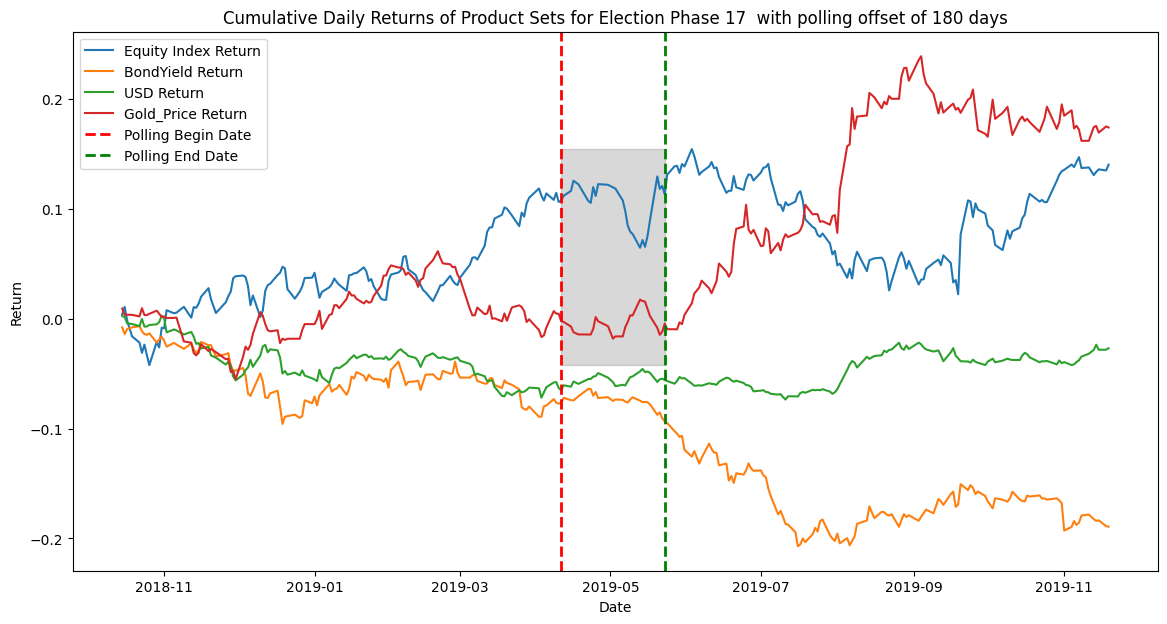

EquityIndex    263.0
BondYield      263.0
USD            263.0
Gold_Price     263.0
Name: count, dtype: float64
EquityIndex    118.0
BondYield      118.0
USD            118.0
Gold_Price     118.0
Name: count, dtype: float64
EquityIndex    27.0
BondYield      27.0
USD            27.0
Gold_Price     27.0
Name: count, dtype: float64
EquityIndex    118.0
BondYield      118.0
USD            118.0
Gold_Price     118.0
Name: count, dtype: float64


In [384]:
Offsetperioddays = 180
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 17  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 17   0.000540            0.009174  0.000084   
BondYield      Election Phase 17  -0.000772            0.007123  0.000051   
USD            Election Phase 17  -0.000096            0.003950  0.000016   
Gold_Price     Election Phase 17   0.000648            0.008699  0.000076   
EquityIndex   Pre-Polling Period   0.000887            0.008019  0.000064   
BondYield     Pre-Polling Period  -0.000659            0.006709  0.000045   
USD           Pre-Polling Period  -0.000541            0.004646  0.000022   
Gold_Price    Pre-Polling Period   0.000063            0.007091  0.000050   
EquityIndex       Polling Period   0.000286            0.010641  0.000113   
BondYield         Polling Period  -0.000642            0.003858  0.000015   
USD               Polling Period   0.000286            0.003461  0.000012   
Gold_Price        Polling P

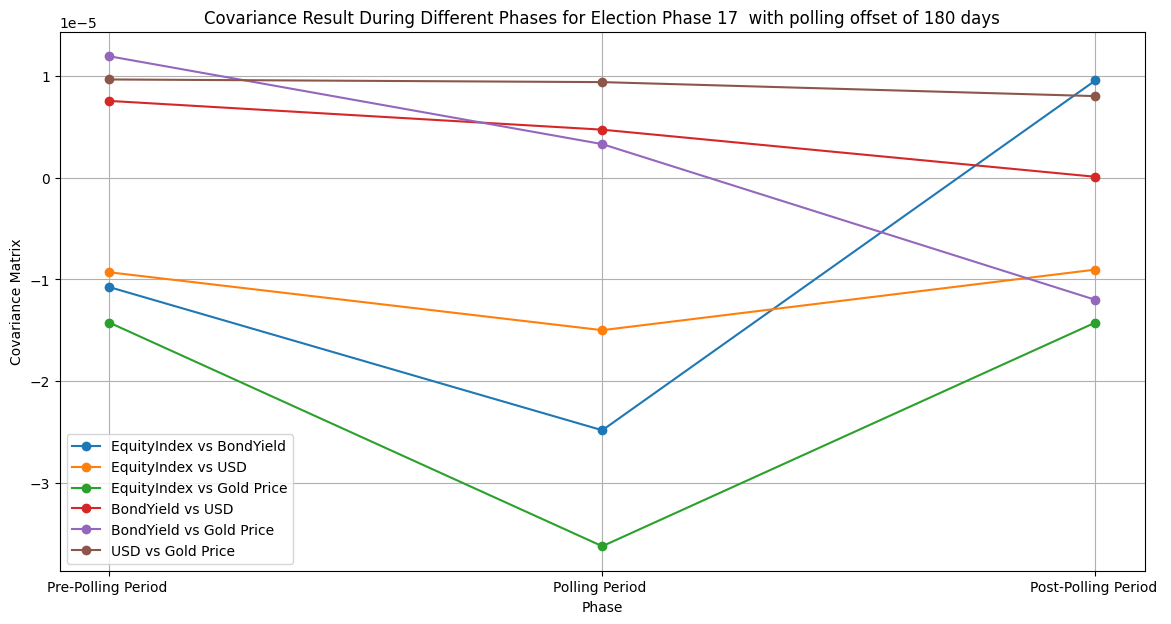

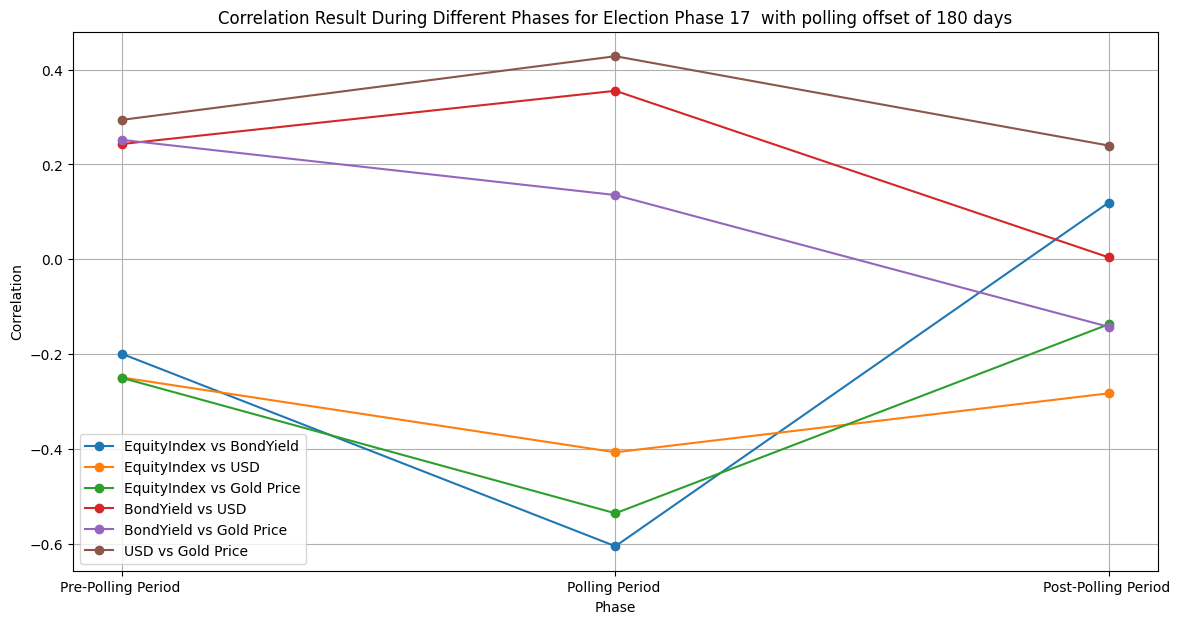

In [385]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [386]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 1.000510 0.318877
  BondYield                 6.720603 0.010520
        USD                 2.435131 0.120854
 Gold Price                 0.027109 0.869454
Levenes Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.746612 0.388436
  BondYield                 2.562913 0.110746
        USD                13.509729 0.000294
 Gold Price                10.955948 0.001080


In [387]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.8126588085442039
P-value: 0.9999341004983362
Boxs M Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.8126588085442039
P-value: 0.9999341004983362


In [388]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.223117 -0.790162   -1.525566
BondYield      -2.223117        NaN  0.549755   -0.539073
USD            -0.790162   0.549755       NaN    0.689243
Gold_Price     -1.525566  -0.539073  0.689243         NaN 
 P-value =           0         1         2         3
0       NaN  0.026208  0.429433  0.127118
1  0.026208       NaN  0.582487  0.589836
2  0.429433  0.582487       NaN  0.490671
3  0.127118  0.589836  0.490671       NaN
Fisher's Z Test Result for Election Phase 17  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   2.445719 -0.271836    0.892480
BondYield       2.445719        NaN -1.850103   -3.037745
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 17 with 365 days pre & post polling period

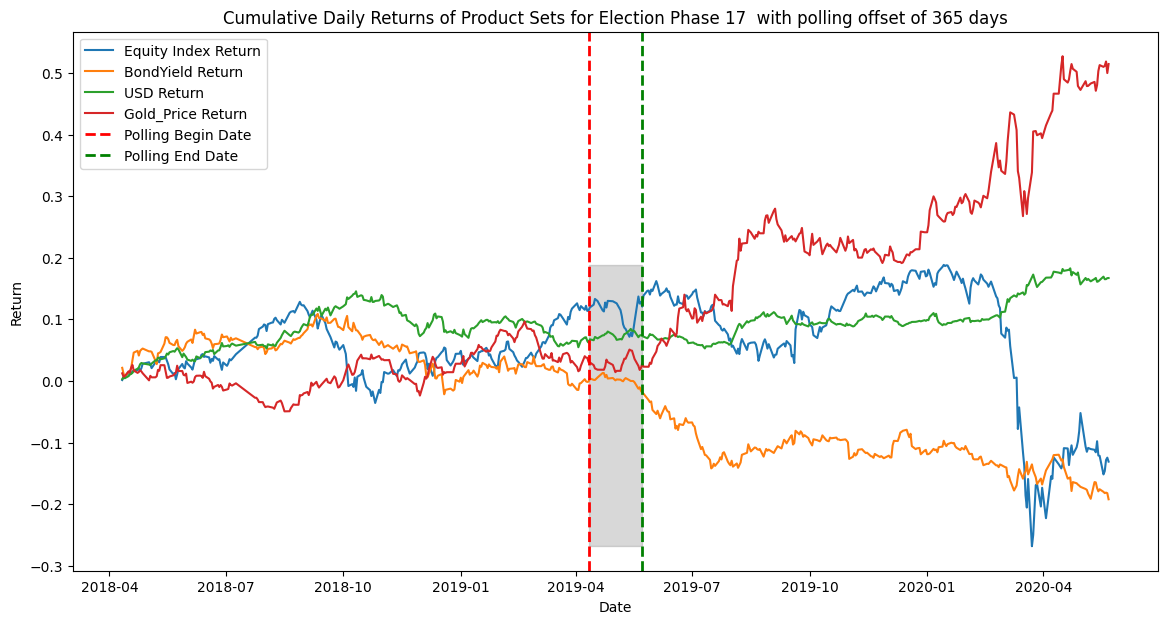

EquityIndex    499.0
BondYield      499.0
USD            499.0
Gold_Price     499.0
Name: count, dtype: float64
EquityIndex    233.0
BondYield      233.0
USD            233.0
Gold_Price     233.0
Name: count, dtype: float64
EquityIndex    27.0
BondYield      27.0
USD            27.0
Gold_Price     27.0
Name: count, dtype: float64
EquityIndex    239.0
BondYield      239.0
USD            239.0
Gold_Price     239.0
Name: count, dtype: float64


In [389]:
Offsetperioddays = 365
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 17  :

                            Phase      Mean  Standard Deviation  Variance  \
EquityIndex    Election Phase 17  -0.000163            0.015331  0.000235   
BondYield      Election Phase 17  -0.000398            0.007680  0.000059   
USD            Election Phase 17   0.000318            0.004024  0.000016   
Gold_Price     Election Phase 17   0.000878            0.009556  0.000091   
EquityIndex   Pre-Polling Period   0.000495            0.008103  0.000066   
BondYield     Pre-Polling Period   0.000015            0.006604  0.000044   
USD           Pre-Polling Period   0.000280            0.004507  0.000020   
Gold_Price    Pre-Polling Period   0.000182            0.006805  0.000046   
EquityIndex       Polling Period   0.000286            0.010641  0.000113   
BondYield         Polling Period  -0.000642            0.003858  0.000015   
USD               Polling Period   0.000286            0.003461  0.000012   
Gold_Price        Polling P

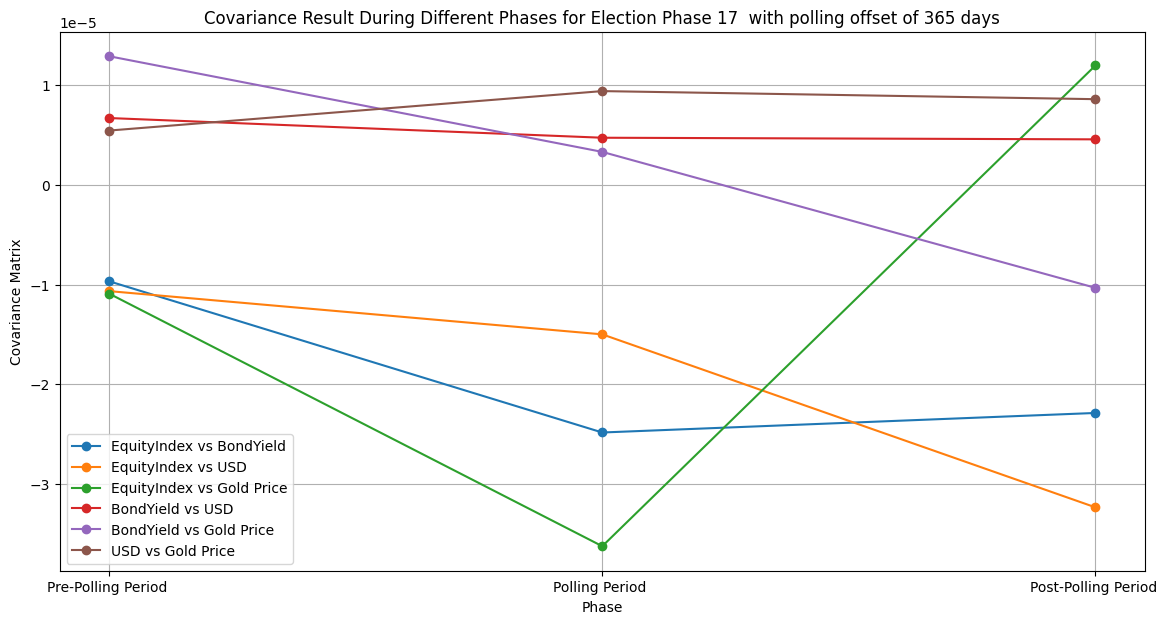

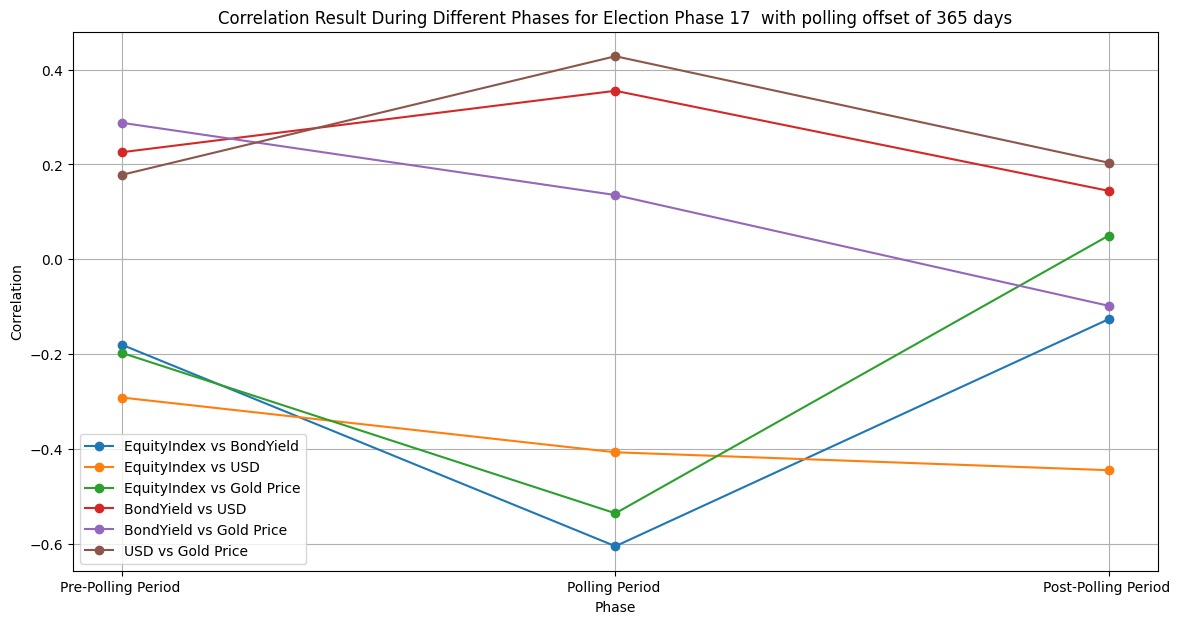

In [390]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [391]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 1.353186 0.245797
  BondYield                 6.421770 0.011865
        USD                 1.771770 0.184338
 Gold Price                 0.006438 0.936113
Levenes Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic      p-value
EquityIndex                19.579408 1.200649e-05
  BondYield                 9.004825 2.835853e-03
        USD                12.388581 4.740306e-04
 Gold Price                27.062537 2.946843e-07


In [392]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.8198812858907681
P-value: 0.9999313244806277
Boxs M Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.8198812858907681
P-value: 0.9999313244806277


In [393]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.418186 -0.613903   -1.854537
BondYield      -2.418186        NaN  0.660375   -0.744855
USD            -0.613903   0.660375       NaN    1.293944
Gold_Price     -1.854537  -0.744855  1.293944         NaN 
 P-value =           0         1         2         3
0       NaN  0.015598  0.539280  0.063662
1  0.015598       NaN  0.509013  0.456359
2  0.539280  0.509013       NaN  0.195685
3  0.063662  0.456359  0.195685       NaN
Fisher's Z Test Result for Election Phase 17  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.598644 -1.919327    2.700317
BondYield       0.598644        NaN -0.911569   -4.256882
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


##Election Phase 18

In [394]:
NameA = 'Election Phase 18 '
NameB = "Pre-Polling Period "
NameC = "Polling Period "
NameD = "Post-Polling Period "
PollingBigin = pd.to_datetime('2024-04-19')
PollingEnd = pd.to_datetime('2024-06-04')

###Election Phase 18 with 90 days pre & post polling period

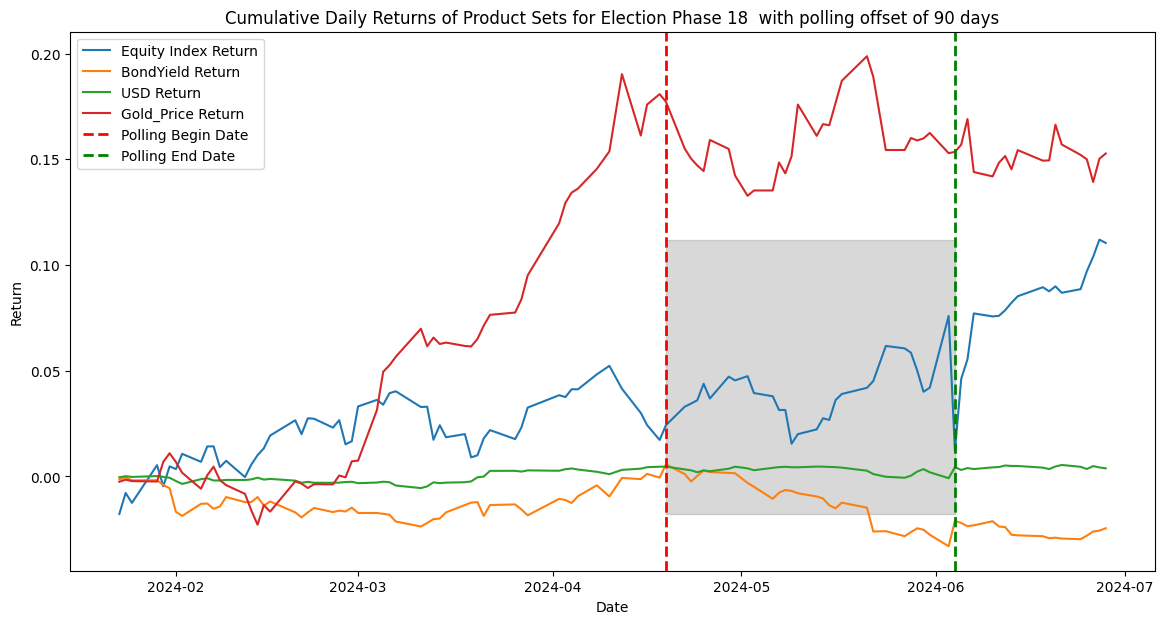

EquityIndex    101.0
BondYield      101.0
USD            101.0
Gold_Price     101.0
Name: count, dtype: float64
EquityIndex    54.0
BondYield      54.0
USD            54.0
Gold_Price     54.0
Name: count, dtype: float64
EquityIndex    30.0
BondYield      30.0
USD            30.0
Gold_Price     30.0
Name: count, dtype: float64
EquityIndex    17.0
BondYield      17.0
USD            17.0
Gold_Price     17.0
Name: count, dtype: float64


In [395]:
Offsetperioddays = 90
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 18  :

                            Phase      Mean  Standard Deviation      Variance  \
EquityIndex    Election Phase 18   0.001091            0.010287  1.058309e-04   
BondYield      Election Phase 18  -0.000240            0.003457  1.195233e-05   
USD            Election Phase 18   0.000039            0.001074  1.153346e-06   
Gold_Price     Election Phase 18   0.001451            0.009257  8.568464e-05   
EquityIndex   Pre-Polling Period   0.000345            0.007559  5.714076e-05   
BondYield     Pre-Polling Period  -0.000004            0.003485  1.214779e-05   
USD           Pre-Polling Period   0.000086            0.000916  8.383243e-07   
Gold_Price    Pre-Polling Period   0.003121            0.008856  7.842222e-05   
EquityIndex       Polling Period  -0.000070            0.014167  2.007157e-04   
BondYield         Polling Period  -0.000681            0.004174  1.742106e-05   
USD               Polling Period  -0.000005            0.001

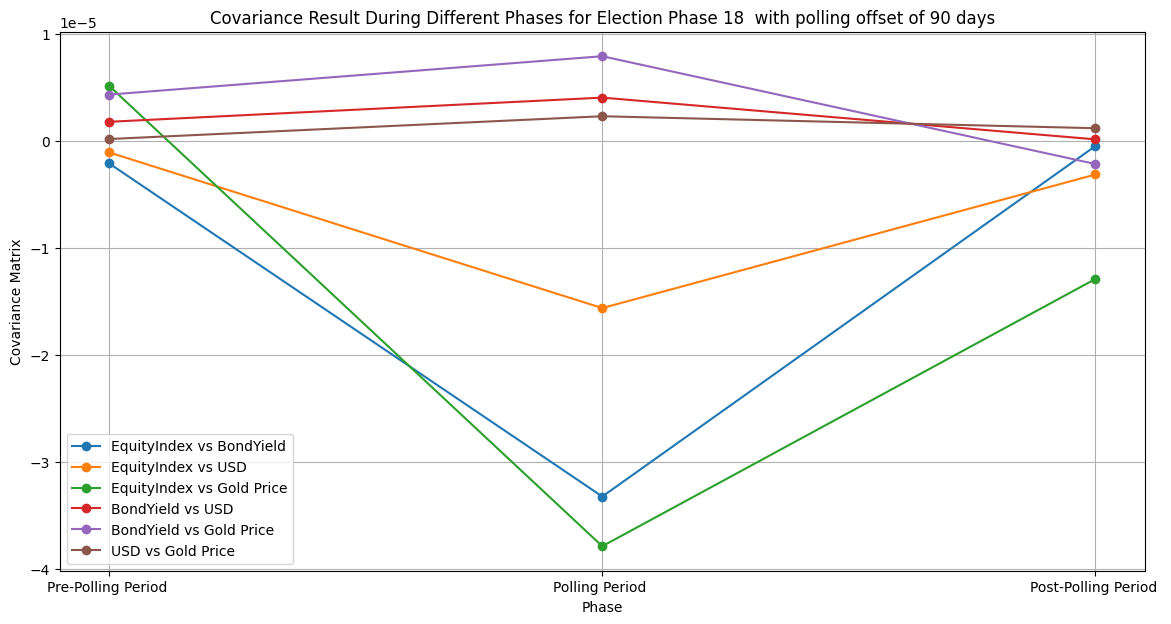

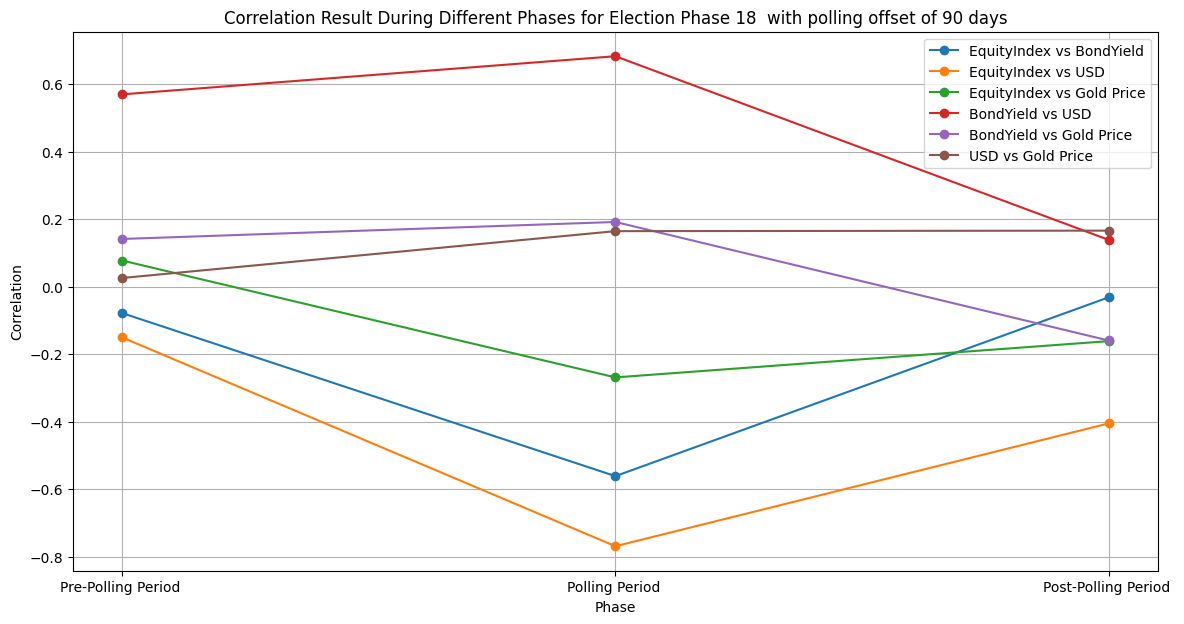

In [396]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [397]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.838217 0.362592
  BondYield                 0.212523 0.646017
        USD                 2.414270 0.124085
 Gold Price                 0.344756 0.558710
Levenes Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.166306 0.684678
  BondYield                 6.244689 0.014841
        USD                 0.051506 0.821134
 Gold Price                 0.045369 0.831955


In [398]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.5237669607921153
P-value: 0.9999917418967373
Boxs M Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.5237669607921153
P-value: 0.9999917418967373


In [399]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.337060 -3.639527   -1.483860
BondYield      -2.337060        NaN  0.785867    0.217726
USD            -3.639527   0.785867       NaN    0.589458
Gold_Price     -1.483860   0.217726  0.589458         NaN 
 P-value =           0         1         2         3
0       NaN  0.019436  0.000273  0.137846
1  0.019436       NaN  0.431946  0.827643
2  0.000273  0.431946       NaN  0.555554
3  0.137846  0.827643  0.555554       NaN
Fisher's Z Test Result for Election Phase 18  with polling offset of 90 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.155359 -0.922357   -0.796538
BondYield       0.155359        NaN -1.681950   -1.004617
USD          

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 18 with 180 days pre & post polling period

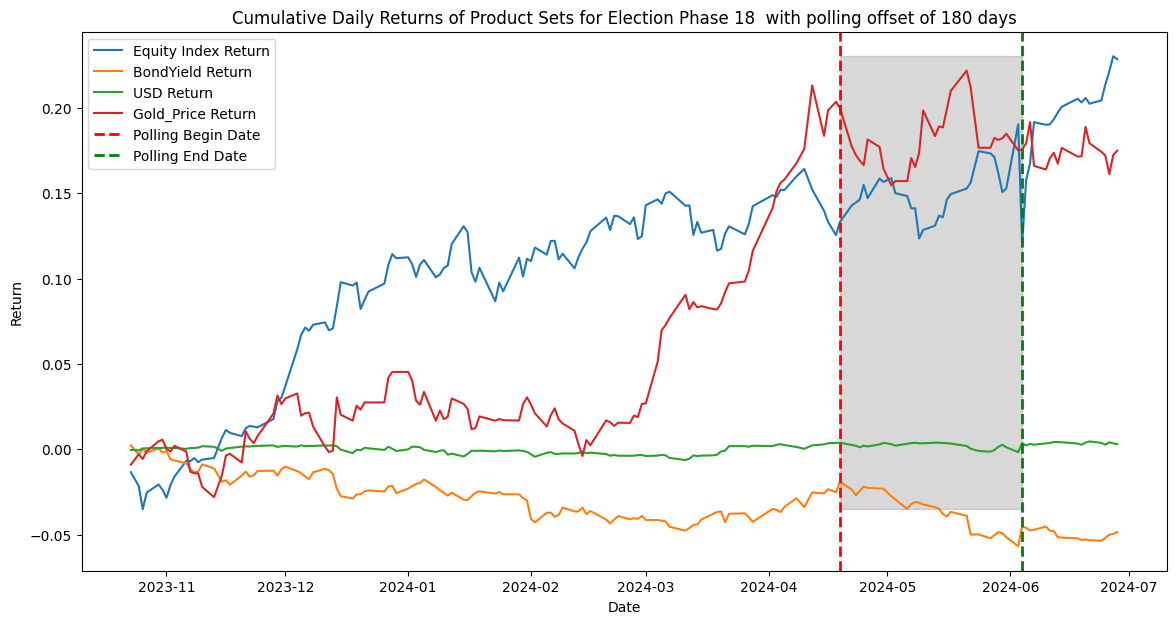

EquityIndex    162.0
BondYield      162.0
USD            162.0
Gold_Price     162.0
Name: count, dtype: float64
EquityIndex    115.0
BondYield      115.0
USD            115.0
Gold_Price     115.0
Name: count, dtype: float64
EquityIndex    30.0
BondYield      30.0
USD            30.0
Gold_Price     30.0
Name: count, dtype: float64
EquityIndex    17.0
BondYield      17.0
USD            17.0
Gold_Price     17.0
Name: count, dtype: float64


In [400]:
Offsetperioddays = 180
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 18  :

                            Phase      Mean  Standard Deviation      Variance  \
EquityIndex    Election Phase 18   0.001315            0.009256  8.567577e-05   
BondYield      Election Phase 18  -0.000301            0.003268  1.068173e-05   
USD            Election Phase 18   0.000019            0.001038  1.078051e-06   
Gold_Price     Election Phase 18   0.001035            0.008896  7.914033e-05   
EquityIndex   Pre-Polling Period   0.001056            0.007420  5.506284e-05   
BondYield     Pre-Polling Period  -0.000216            0.003206  1.027983e-05   
USD           Pre-Polling Period   0.000034            0.000950  9.020934e-07   
Gold_Price    Pre-Polling Period   0.001650            0.008637  7.459287e-05   
EquityIndex       Polling Period  -0.000070            0.014167  2.007157e-04   
BondYield         Polling Period  -0.000681            0.004174  1.742106e-05   
USD               Polling Period  -0.000005            0.001

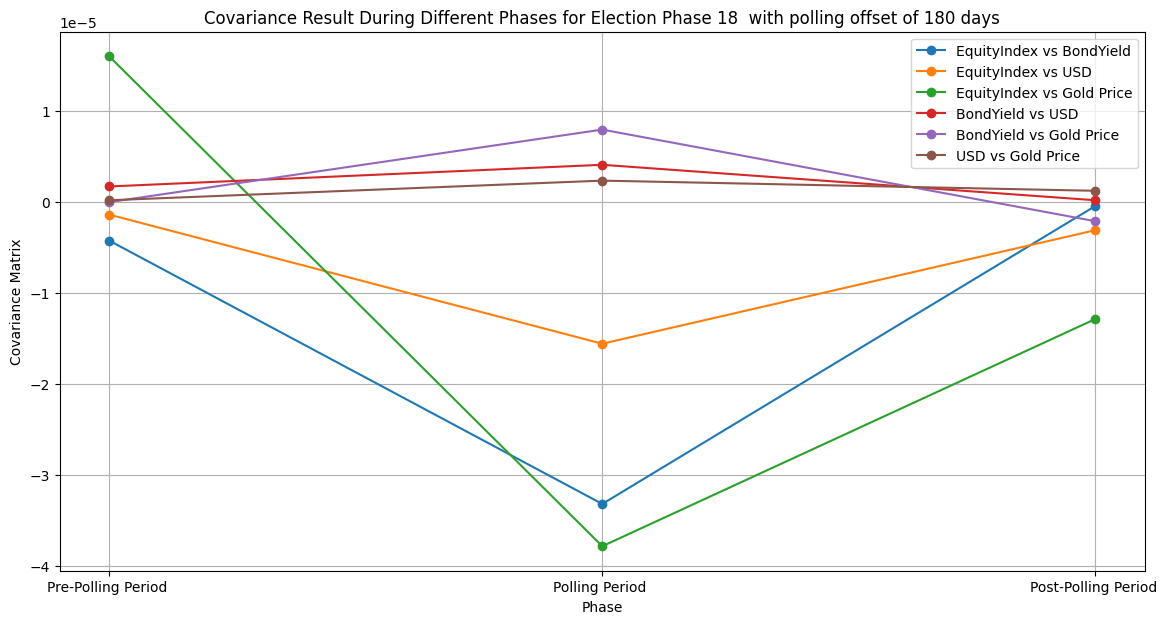

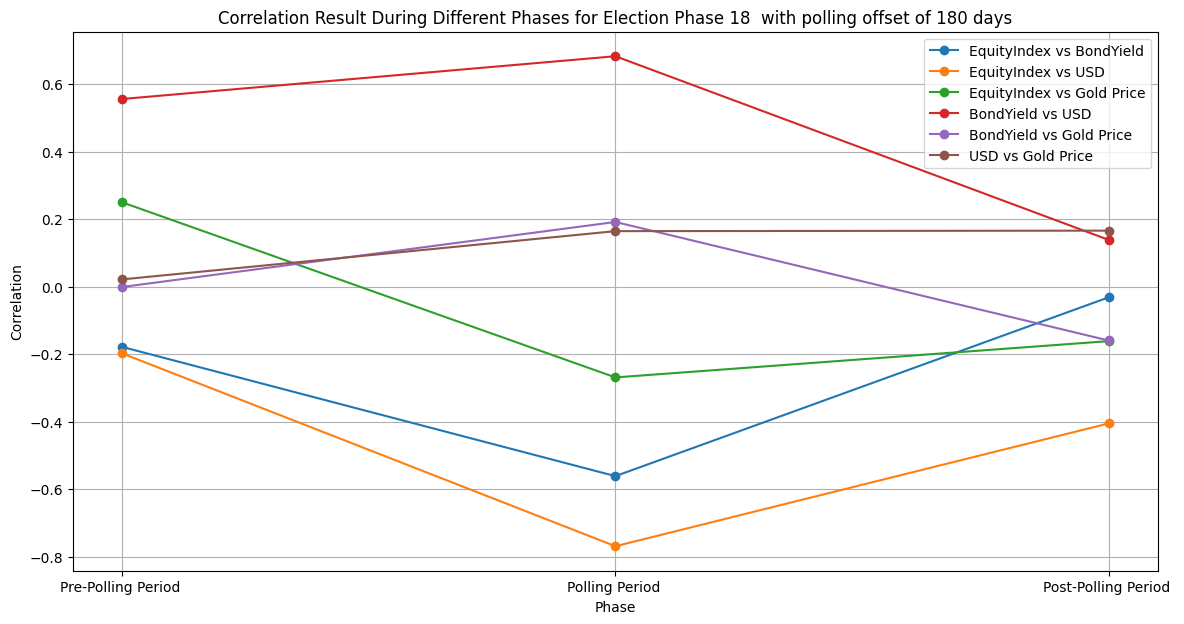

In [401]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [402]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 2.065768 0.152824
  BondYield                 0.593598 0.442302
        USD                 3.017830 0.084507
 Gold Price                 0.497123 0.481914
Levenes Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.038511 0.844727
  BondYield                 7.487294 0.007083
        USD                 0.018818 0.891102
 Gold Price                 0.064059 0.800591


In [403]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.585719745825907
P-value: 0.9999859231922616
Boxs M Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.585719745825907
P-value: 0.9999859231922616


In [404]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.118945 -3.812482   -2.475868
BondYield      -2.118945        NaN  0.966031    0.909385
USD            -3.812482   0.966031       NaN    0.673525
Gold_Price     -2.475868   0.909385  0.673525         NaN 
 P-value =           0         1         2         3
0       NaN  0.034095  0.000138  0.013291
1  0.034095       NaN  0.334029  0.363147
2  0.000138  0.334029       NaN  0.500613
3  0.013291  0.363147  0.500613       NaN
Fisher's Z Test Result for Election Phase 18  with polling offset of 180 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.524941 -0.809467   -1.474523
BondYield       0.524941        NaN -1.719409   -0.564307
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


###Election Phase 18 with 365 days pre & post polling period

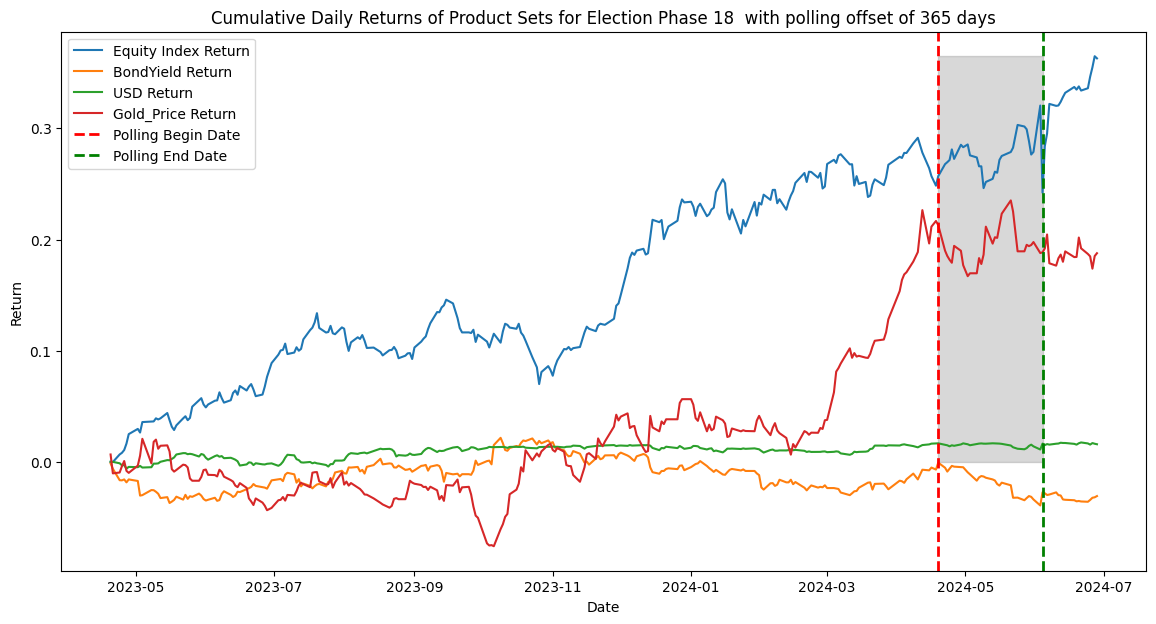

EquityIndex    287.0
BondYield      287.0
USD            287.0
Gold_Price     287.0
Name: count, dtype: float64
EquityIndex    240.0
BondYield      240.0
USD            240.0
Gold_Price     240.0
Name: count, dtype: float64
EquityIndex    30.0
BondYield      30.0
USD            30.0
Gold_Price     30.0
Name: count, dtype: float64
EquityIndex    17.0
BondYield      17.0
USD            17.0
Gold_Price     17.0
Name: count, dtype: float64


In [405]:
Offsetperioddays = 365
ElectionPhase, PollingPhase, PollingPhaseBefore, PollingPhaseAfter = ElectionPhaseA(df_Returns, PollingBigin, PollingEnd, Offsetperioddays)

Statistical Summary of the Election Phase 18  :

                            Phase      Mean  Standard Deviation      Variance  \
EquityIndex    Election Phase 18   0.001109            0.007701  5.930211e-05   
BondYield      Election Phase 18  -0.000101            0.003567  1.272304e-05   
USD            Election Phase 18   0.000057            0.001271  1.614330e-06   
Gold_Price     Election Phase 18   0.000633            0.008176  6.685344e-05   
EquityIndex   Pre-Polling Period   0.000945            0.006282  3.945921e-05   
BondYield     Pre-Polling Period  -0.000021            0.003592  1.290547e-05   
USD           Pre-Polling Period   0.000071            0.001279  1.634967e-06   
Gold_Price    Pre-Polling Period   0.000849            0.007913  6.260923e-05   
EquityIndex       Polling Period  -0.000070            0.014167  2.007157e-04   
BondYield         Polling Period  -0.000681            0.004174  1.742106e-05   
USD               Polling Period  -0.000005            0.001

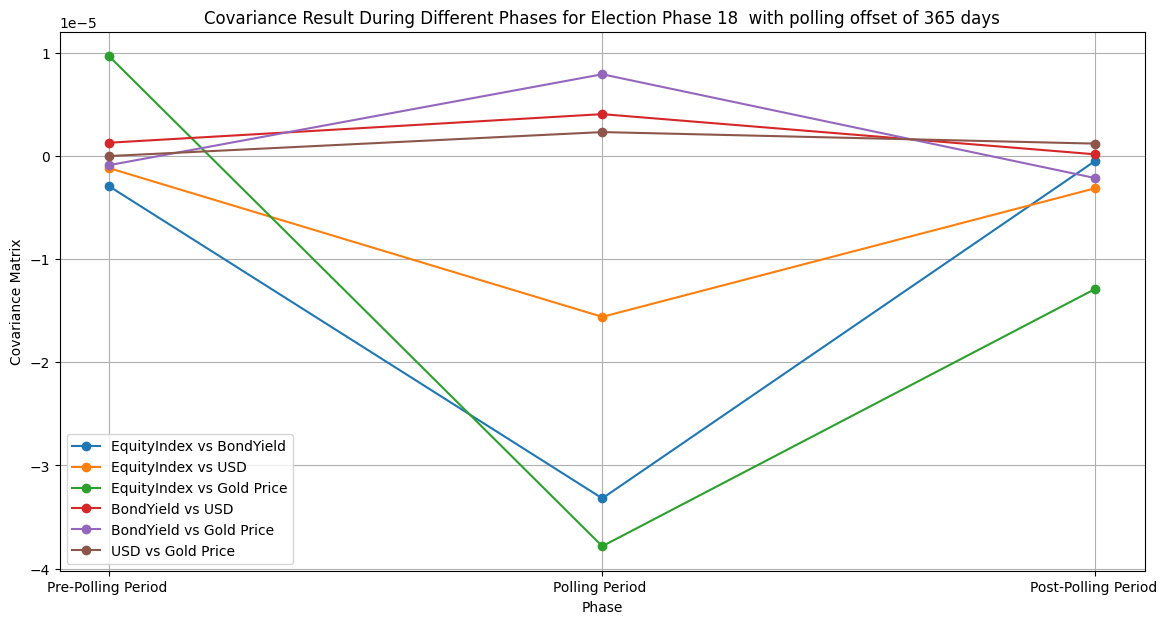

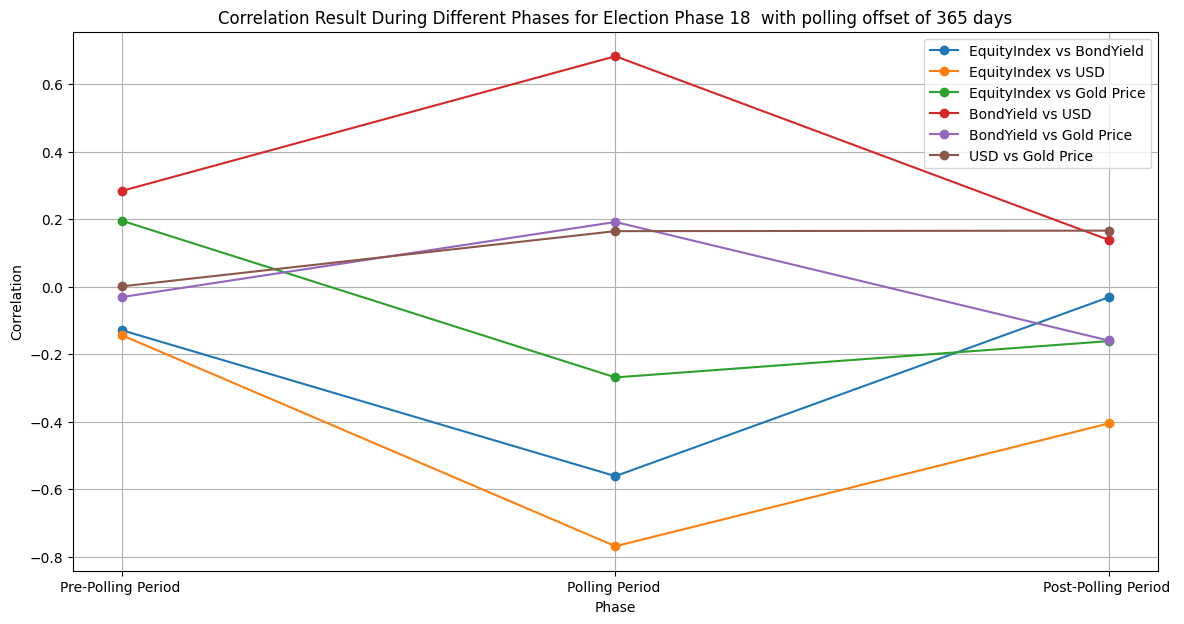

In [406]:
statistcs(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

In [407]:
statistical_levene_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Levenes Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 7.299594 0.007337
  BondYield                 0.134785 0.713811
        USD                 0.012546 0.910899
 Gold Price                 1.776578 0.183702
Levenes Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
   Variable  Levene's Test Statistic  p-value
EquityIndex                 0.274657 0.600680
  BondYield                 7.003960 0.008639
        USD                 1.136966 0.287303
 Gold Price                 0.486984 0.485912


In [408]:
statistical_boxm_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Boxs M Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Box's M statistic: 0.8270636481877318
P-value: 0.9999284754319846
Boxs M Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Box's M statistic: 0.8270636481877318
P-value: 0.9999284754319846


In [409]:
statistcal_fisher_test(NameA,NameB, NameC, NameD, ElectionPhase,PollingPhaseBefore,PollingPhase,PollingPhaseAfter)

Fisher's Z Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN  -2.484796 -4.295580   -2.329960
BondYield      -2.484796        NaN  2.669199    1.106653
USD            -4.295580   2.669199       NaN    0.812153
Gold_Price     -2.329960   1.106653  0.812153         NaN 
 P-value =           0         1         2         3
0       NaN  0.012963  0.000017  0.019808
1  0.012963       NaN  0.007603  0.268444
2  0.000017  0.007603       NaN  0.416704
3  0.019808  0.268444  0.416704       NaN
Fisher's Z Test Result for Election Phase 18  with polling offset of 365 days with comparision of Pre-Polling vs Post-Polling Period
Fisher's Z-Test: Z =              EquityIndex  BondYield       USD  Gold_Price
EquityIndex          NaN   0.357750 -1.034702   -1.310441
BondYield       0.357750        NaN -0.553954   -0.473218
USD        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)
